

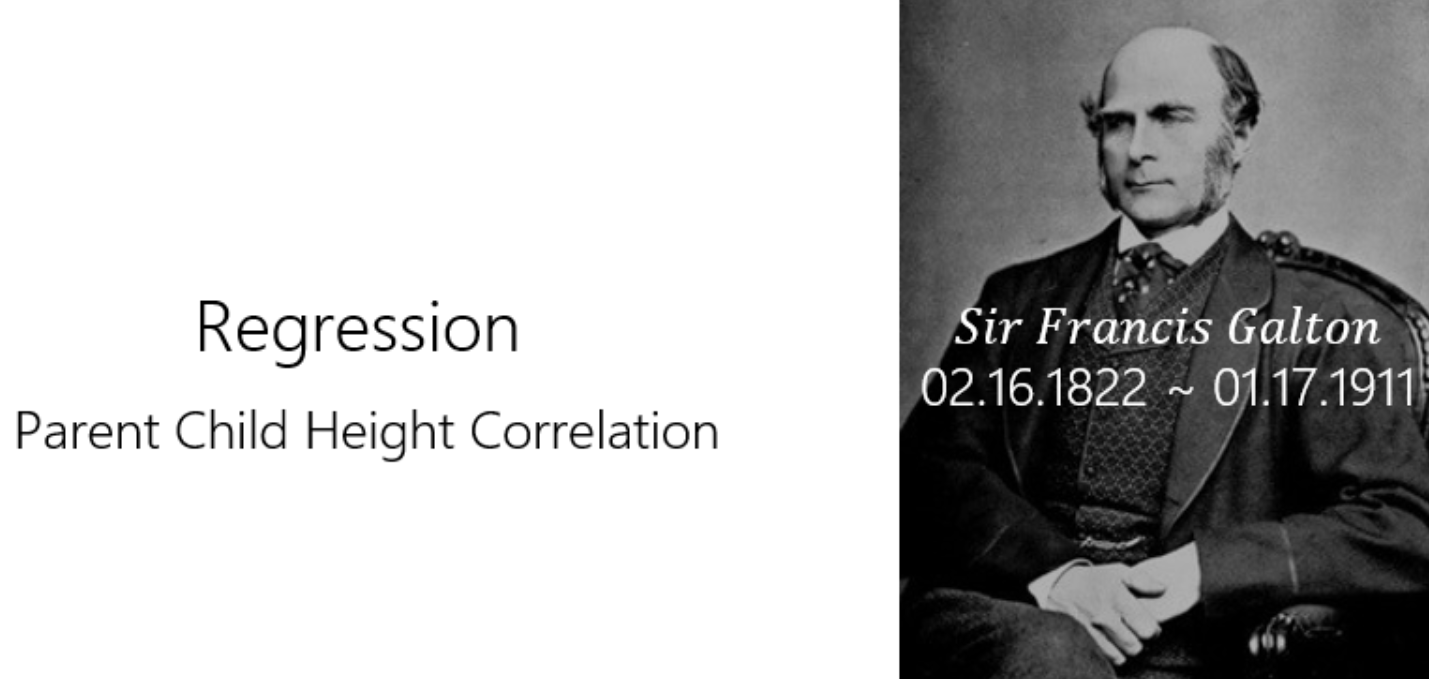

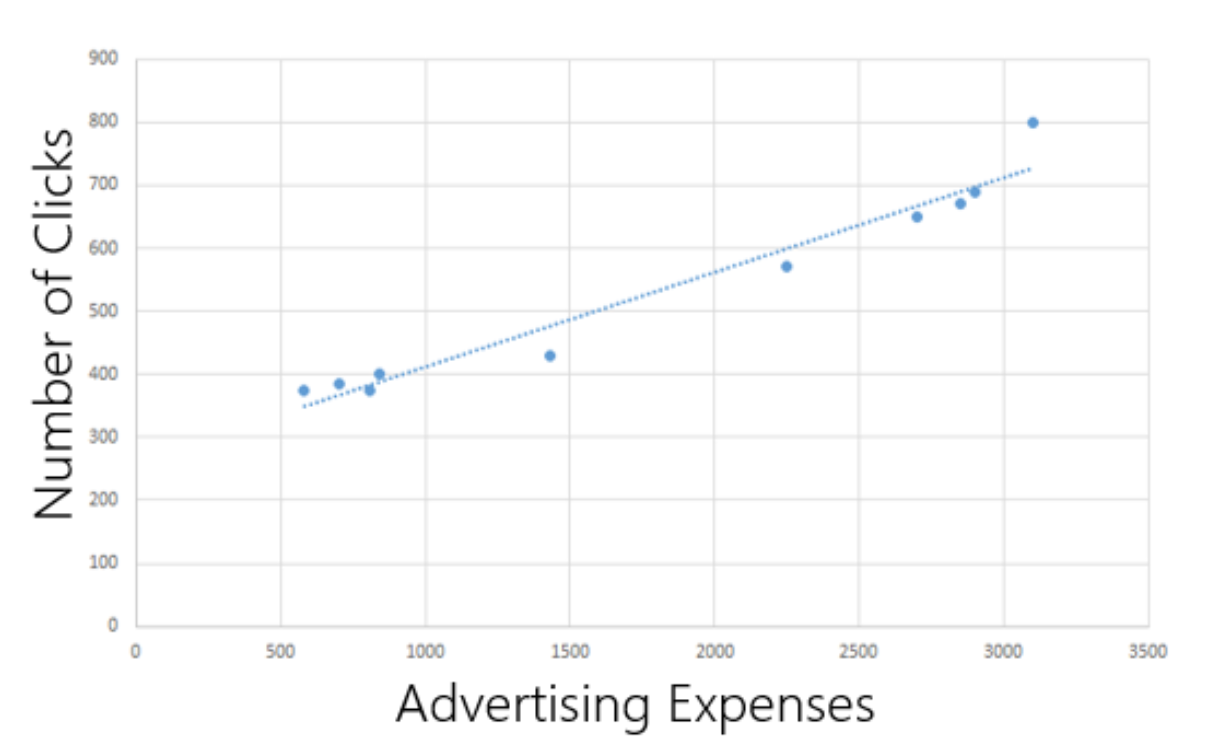

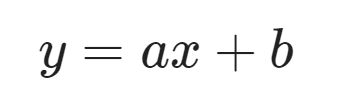

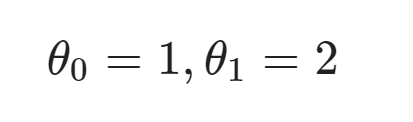

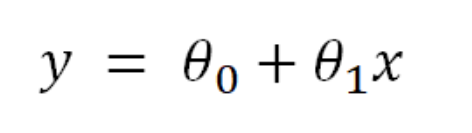

In [ ]:
class Y_pred():
    def __init__(self, theta_0, theta_1):
        self.theta_0 = theta_0
        self.theta_1 = theta_1

In [ ]:
def out_y_hat(self, input_x):
    y_hat_row = []

    for i in range(len(input_x)):
        y_hat = self.theta_0 + self.theta_1 * input_x[i]
        y_hat_row.append(y_hat)

    return y_hat_row

Y_pred.y_hat = out_y_hat

In [ ]:
Y_pred_C = Y_pred(theta_0 = 1, theta_1 = 2)

In [ ]:
x = [1000]
Y_pred_C.y_hat(input_x = x)

[2001]

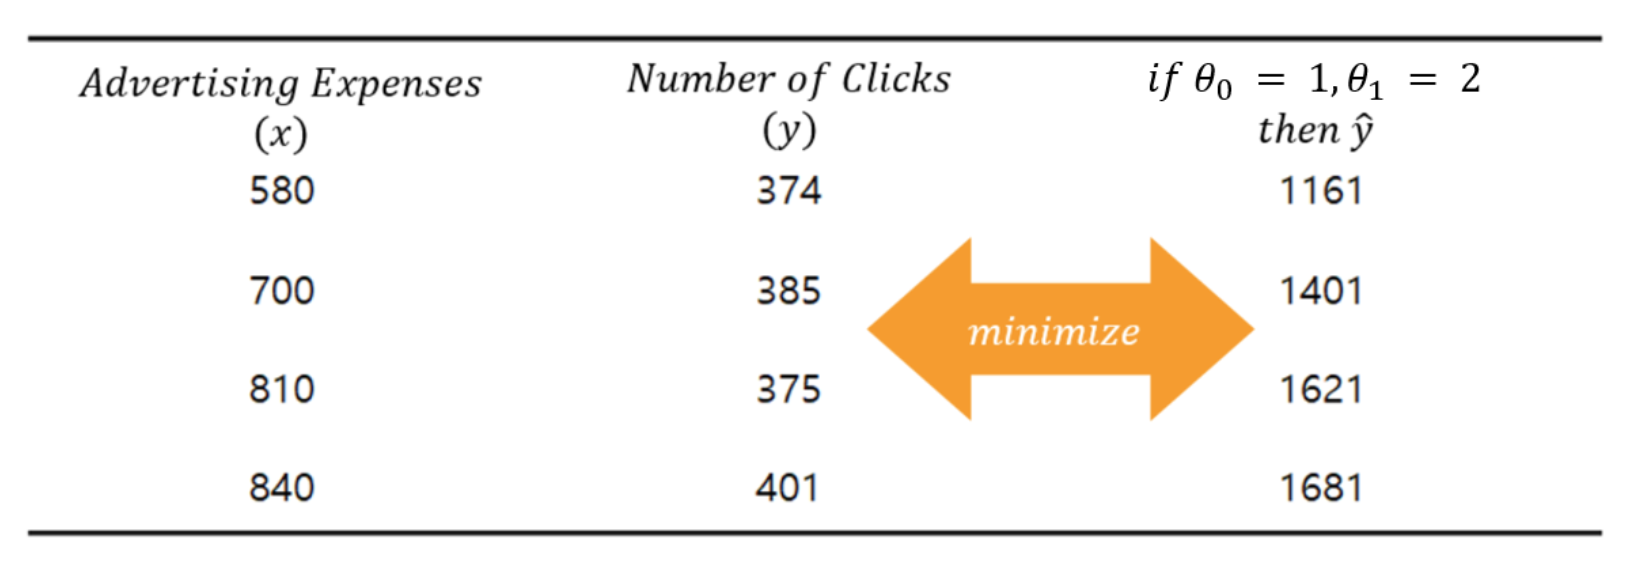

In [ ]:
x = [580, 700, 810, 840]
Y_pred_C = Y_pred(theta_0 = 1, theta_1 = 2)
Y_pred_C.y_hat(input_x = x)

[1161, 1401, 1621, 1681]

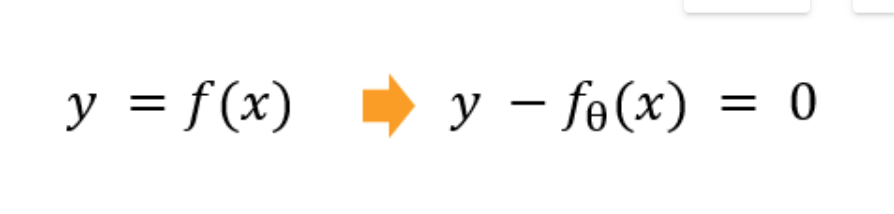

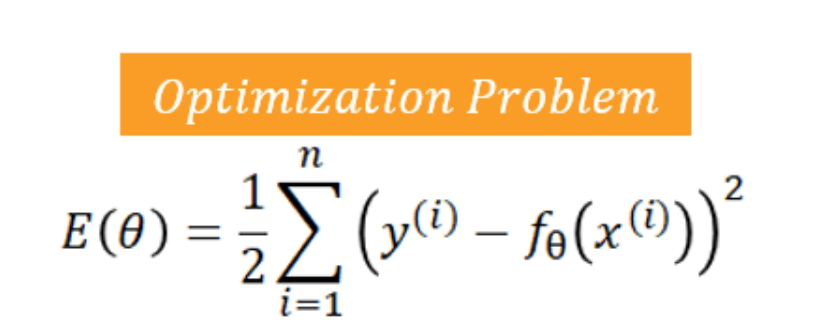

# 손실함수는 MSE외에도 다양하게 존재합니다.
# 목적함수 또한 Sum of Square Error(SSE) 외에도 다양하게 존재합니다. 
# 손실함수와 목적함수는 서로 비슷한 의미를 내포하고 있습니다.  

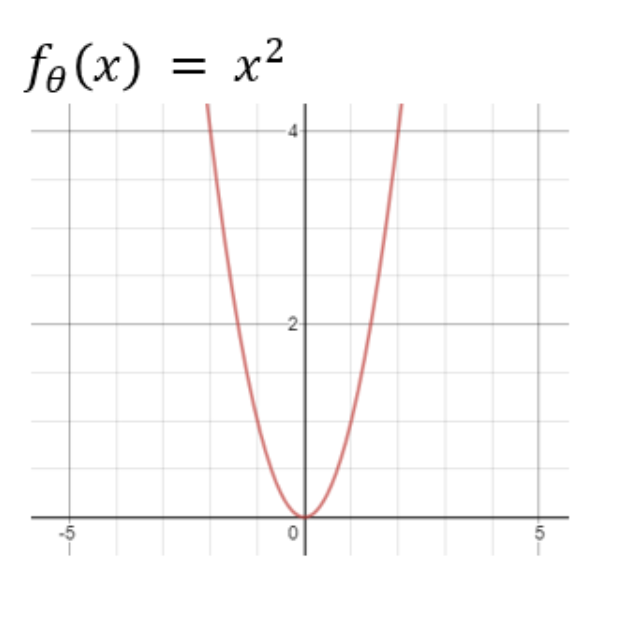

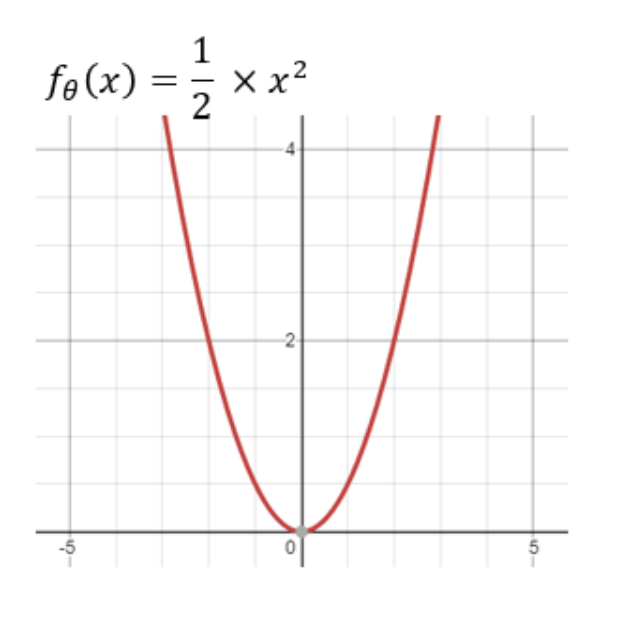

In [ ]:
import numpy as np

y_label_total = [374, 385, 375, 401]
y_hat_total = [1161, 1401, 1621, 1681]

diff_row = []

for i in range(len(y_label_total)):
    diff = y_label_total[i] - y_hat_total[i]
    diff_row.append(diff)
    square = np.square(diff_row)
    sse = 1/2 * (np.sum(square))

print("diff : {} \nsquare : {} \n SSE : {}".format(diff_row, square, sse))

diff : [-787, -1016, -1246, -1280] 
square : [ 619369 1032256 1552516 1638400] 
 SSE : 2421270.5


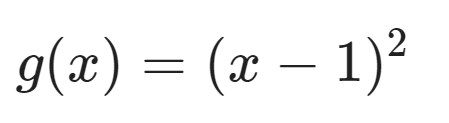

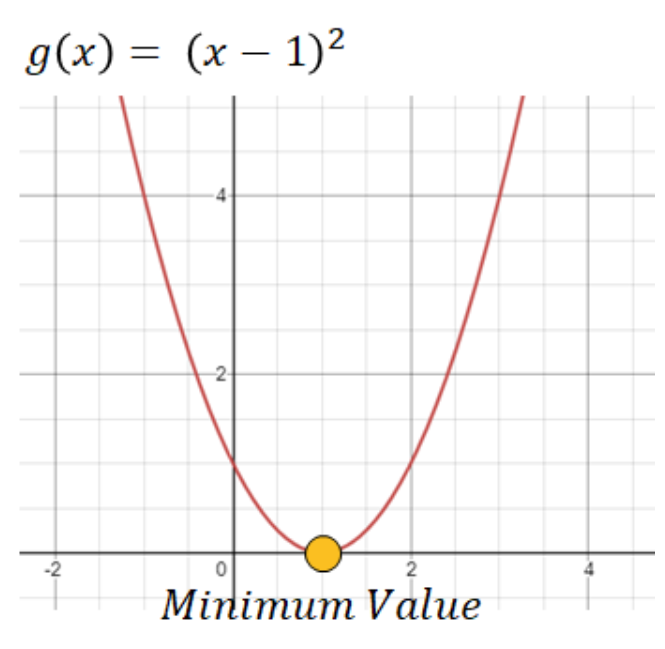

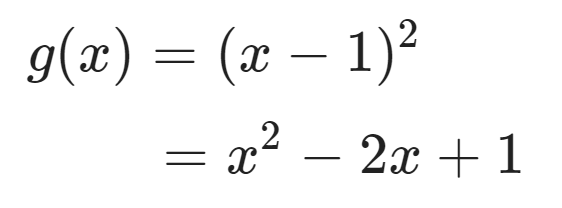

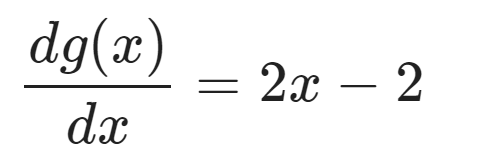

# 학습률 : 1
# 에폭 : 3 
# x    : 3

In [ ]:
def g(x, eta):
    print( "현재 x 값 : ",x)
    epoch_1_x = x - eta*((2*x)-2)
    print(" 첫 번째 에폭 x 값 : {}".format(epoch_1_x))

    epoch_2_x = epoch_1_x - eta*((2*epoch_1_x)-2)
    print(" 두 번째 에폭 x 값 : {}".format(epoch_2_x))

    epoch_3_x = epoch_2_x - eta*((2*epoch_2_x)-2)
    print(" 두 번째 에폭 x 값 : {}".format(epoch_3_x))

result = g(x = 3, eta = 1)

현재 x 값 :  3
 첫 번째 에폭 x 값 : -1
 두 번째 에폭 x 값 : 3
 두 번째 에폭 x 값 : -1


# 학습률           : 0.01
# 반복 갱신 횟수   : 10
# x                : 3  

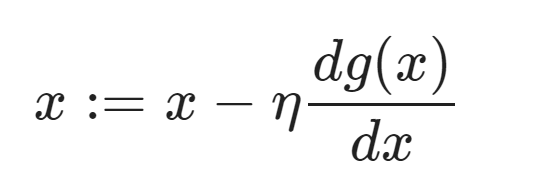

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def g(learning_rate, epoch_count, random_value_bool = False, x = 3):
    if random_value_bool:
        x = np.random.normal(0,1,1)
    
    print("Now 'X' value : ", x)
    print("Now Learning Rate Value : {}".format(learning_rate))

    x_row = []

    for i in range(epoch_count):
        x = x - learning_rate*((2*x) - 2)
        print("Epoch {} - x {}".format(i+1, np.round(x,3)))
        x_row.append(x)
    
    return x_row


In [ ]:
result = g(learning_rate = 0.1, epoch_count = 20, random_value_bool = True)

Now 'X' value :  [-0.94129807]
Now Learning Rate Value : 0.1
Epoch 1 - x [-0.553]
Epoch 2 - x [-0.242]
Epoch 3 - x [0.006]
Epoch 4 - x [0.205]
Epoch 5 - x [0.364]
Epoch 6 - x [0.491]
Epoch 7 - x [0.593]
Epoch 8 - x [0.674]
Epoch 9 - x [0.739]
Epoch 10 - x [0.792]
Epoch 11 - x [0.833]
Epoch 12 - x [0.867]
Epoch 13 - x [0.893]
Epoch 14 - x [0.915]
Epoch 15 - x [0.932]
Epoch 16 - x [0.945]
Epoch 17 - x [0.956]
Epoch 18 - x [0.965]
Epoch 19 - x [0.972]
Epoch 20 - x [0.978]


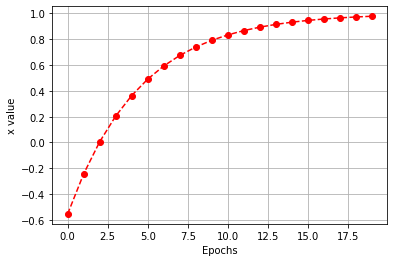

In [ ]:
plt.plot(result, '--o', color = 'red')
plt.xlabel('Epochs')
plt.ylabel('x value')
plt.grid()
plt.show()

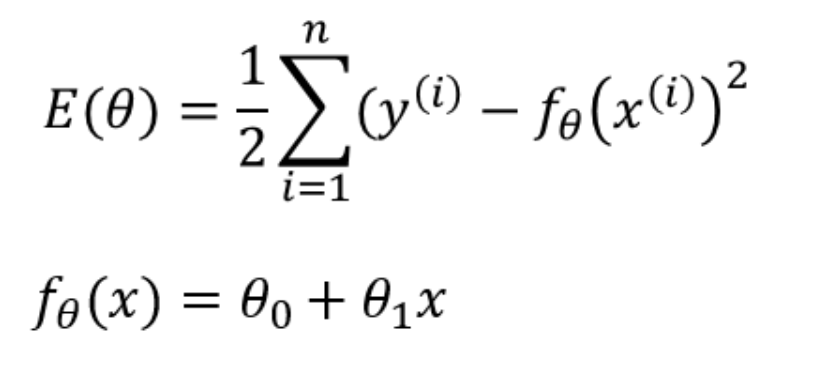

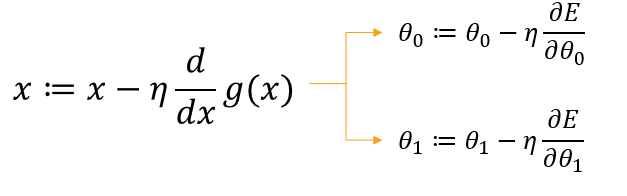

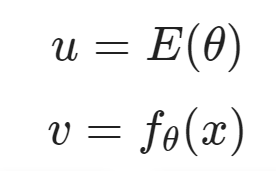

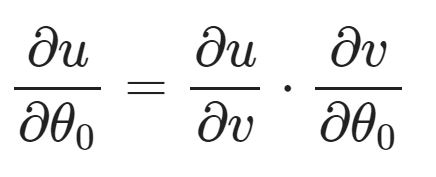

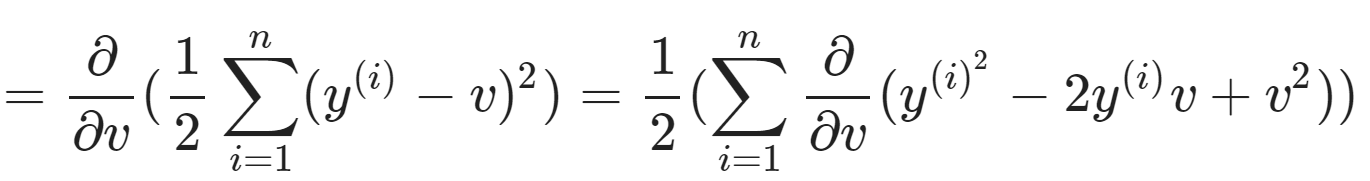

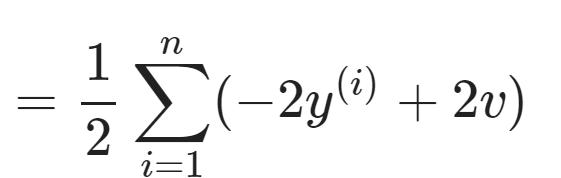

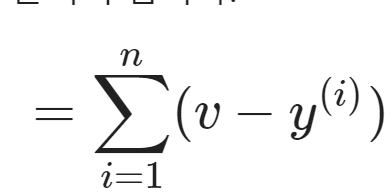

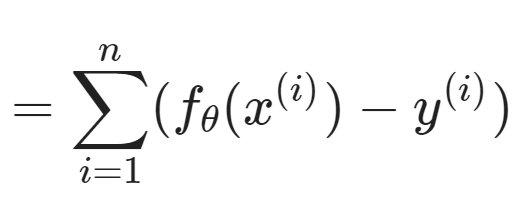

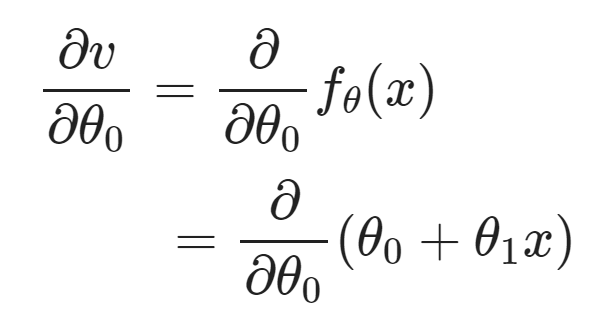

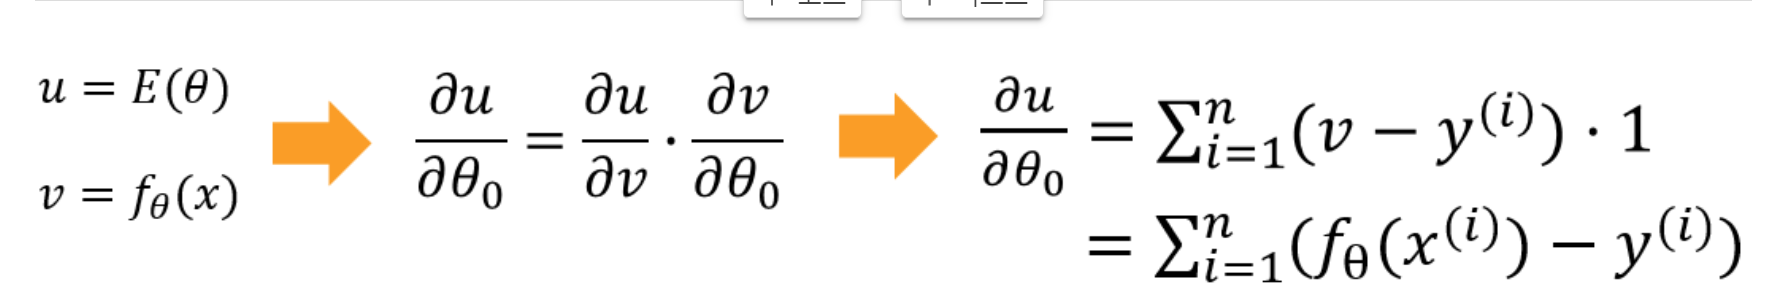

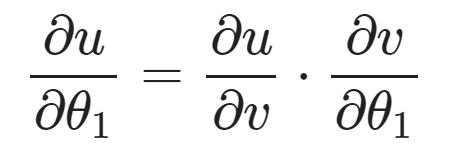

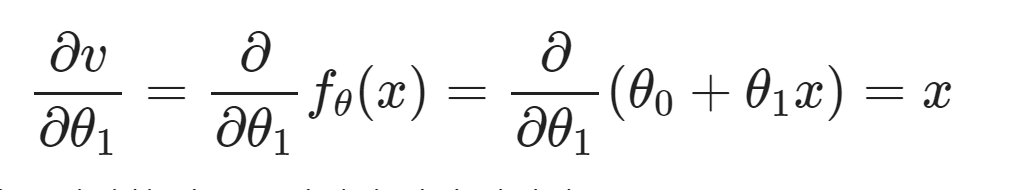

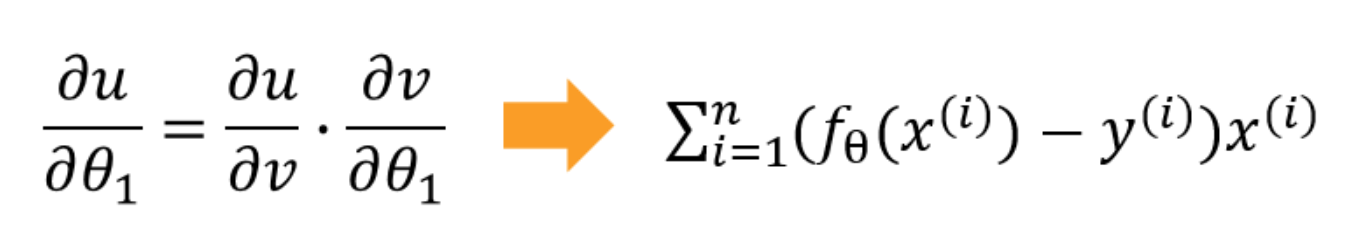

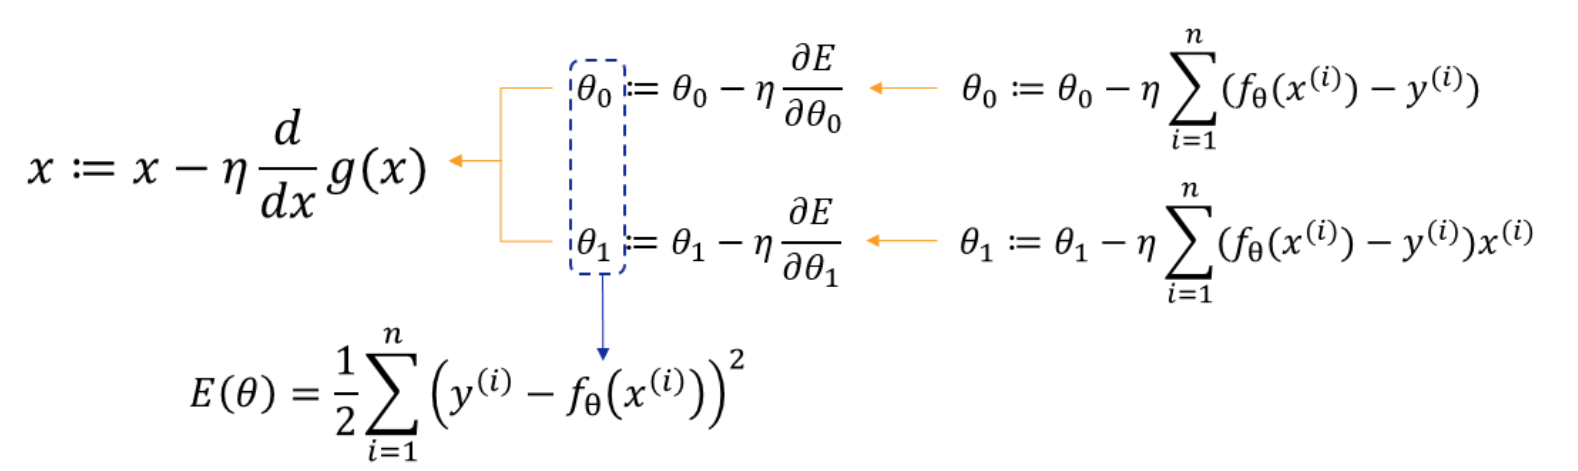

# 경사하강법은 무엇인지 ? 
# 왜쓰는건지? 

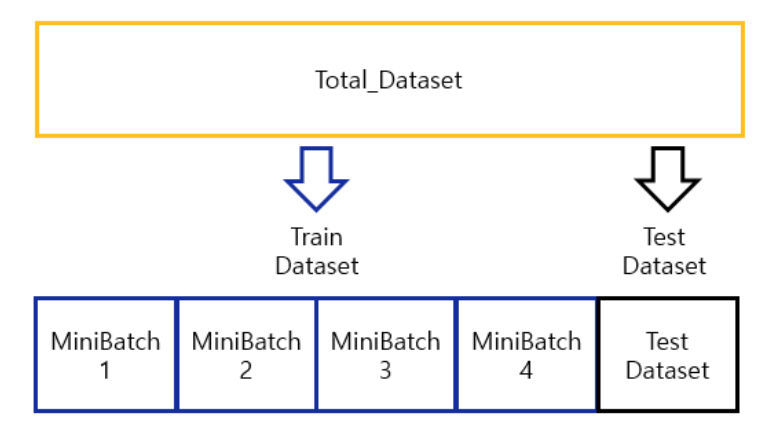

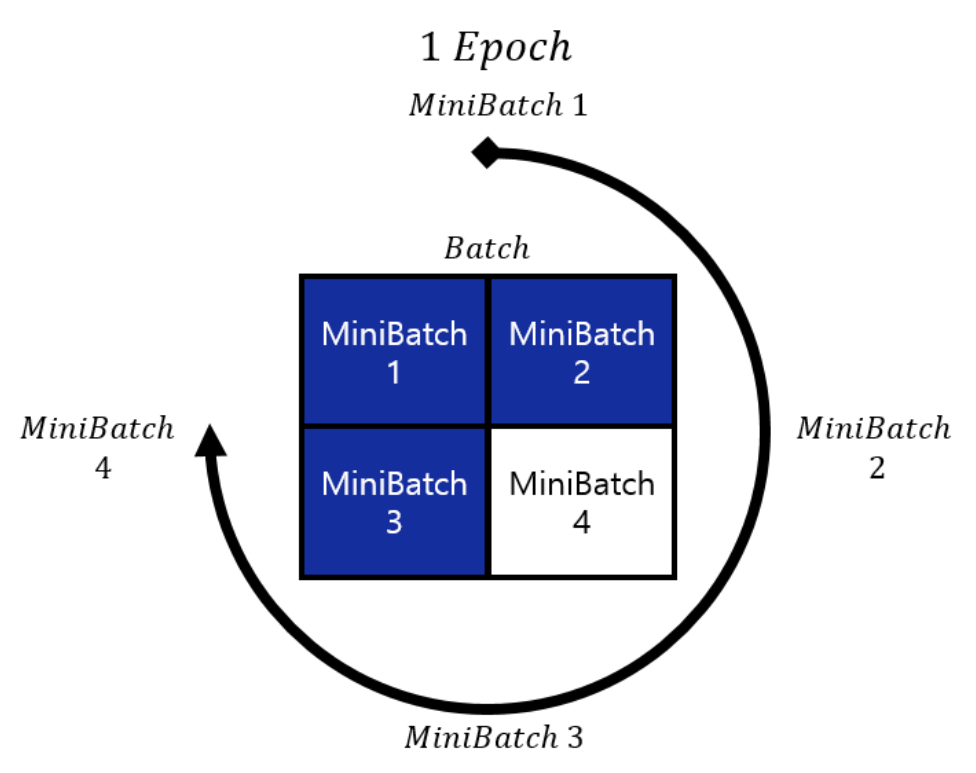

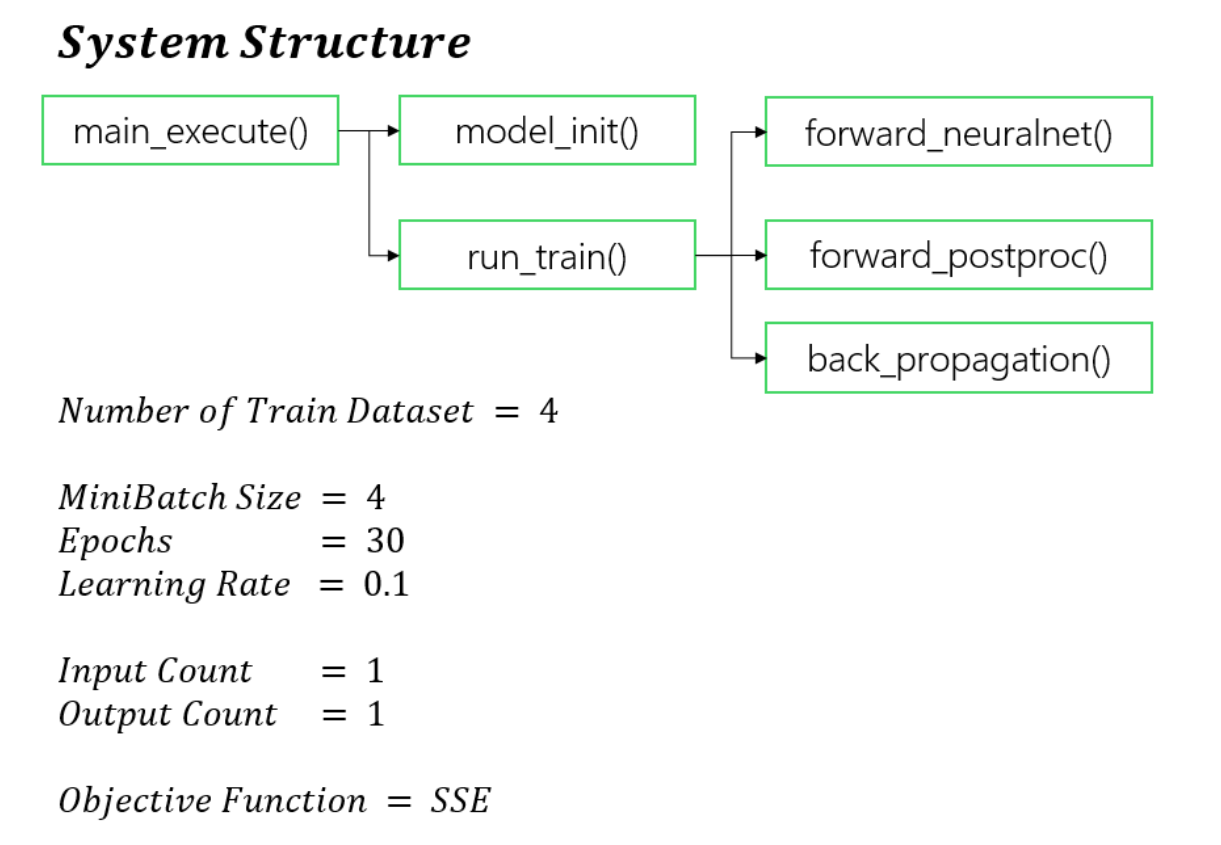

In [ ]:
import numpy as np

x             = np.asarray([580, 700, 810, 840])
y_label_total = np.asarray([374, 385, 375, 401])

RND_MEAN   = 0
RND_STD    = 1

input_cnt  = 1
output_cnt = 1

def main_execute(x,y,epoch_count, report,lr = 0.001):
    model_init()
    theta_0, theta_1, sse_row = run_train(x,y, epoch_count, report, lr)
    
    return theta_0, theta_1, sse_row

def model_init():
    global theta_0, theta_1
    #theta_0 = np.array(1)
    #theta_1 = np.array(2) 
 
    theta_0 = np.random.normal(RND_MEAN, RND_STD, size = [output_cnt])
    theta_1 = np.random.normal(RND_MEAN, RND_STD, size = [input_cnt, output_cnt])
    

def forward_neuralnet(input_x):
    y_hat = theta_0 + theta_1 * input_x

    return y_hat

def forward_postproc(output, y):
    diff   = output-y
    square = np.square(diff)
    sse    = 1/2*(np.sum(square))

    return sse 

def back_propagation(y_hat, lr):

    global theta_0, theta_1

    theta_0 = theta_0 - lr * (np.sum(y_hat - y_label_total))
    theta_1 = theta_1 - lr * (np.sum((y_hat - y_label_total) * x))


def run_train(x, y, epoch_count, report, lr):
    sse_row = []
    print("Initial theta_0 : {}".format(theta_0))
    print("Initial theta_1 : {}".format(theta_1))
    
    theta_0_row = []
    theta_1_row = []
    
    for epoch in range(epoch_count):
        y_hat = forward_neuralnet(x)    
        sse   = forward_postproc(y_hat,y_label_total)
        
        sse_row.append(sse)
        back_propagation(y_hat, lr)
        
        theta_0_row.append(theta_0)
        theta_1_row.append(theta_1)
        
        if report > 0 and (epoch) % report == 0:
            print("Epoch - {}".format(epoch+1))
            print("SSE : {}".format(sse))
    print("==========================")
    print("Final SSE : {}".format(sse))

    return theta_0_row, theta_1_row, sse_row

theta_0, theta_1, sse_row = main_execute(x, 
                                         y_label_total, 
                                         epoch_count = 30, 
                                         report = 4, 
                                         lr = 0.0000001)

Initial theta_0 : [0.88546867]
Initial theta_1 : [[0.53619767]]
Epoch - 1
SSE : 5044.924288579565
Epoch - 5
SSE : 4575.477716839292
Epoch - 9
SSE : 4510.368966737695
Epoch - 13
SSE : 4501.338669580025
Epoch - 17
SSE : 4500.086009626421
Epoch - 21
SSE : 4499.91204634335
Epoch - 25
SSE : 4499.88768974371
Epoch - 29
SSE : 4499.88408240599
Final SSE : 4499.883806173944


In [ ]:
import matplotlib.pyplot as plt

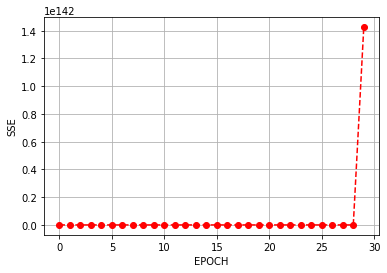

In [ ]:
xplt.plot(sse_row, '--o', color = 'red')
plt.xlabel("EPOCH")
plt.ylabel('SSE')
plt.grid()
plt.show()

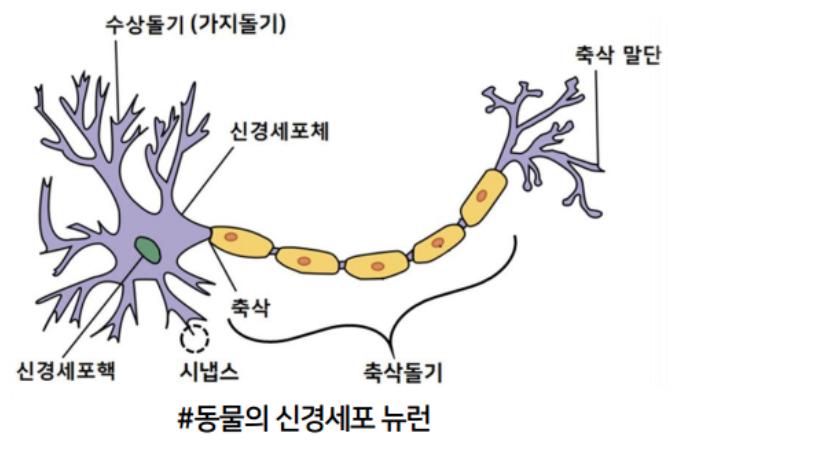

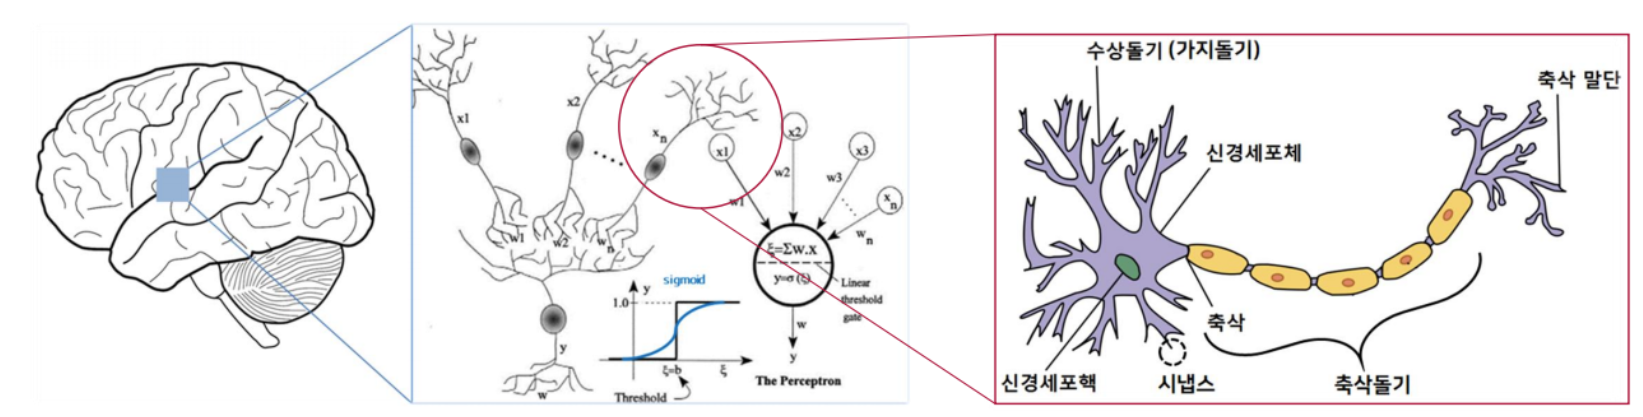

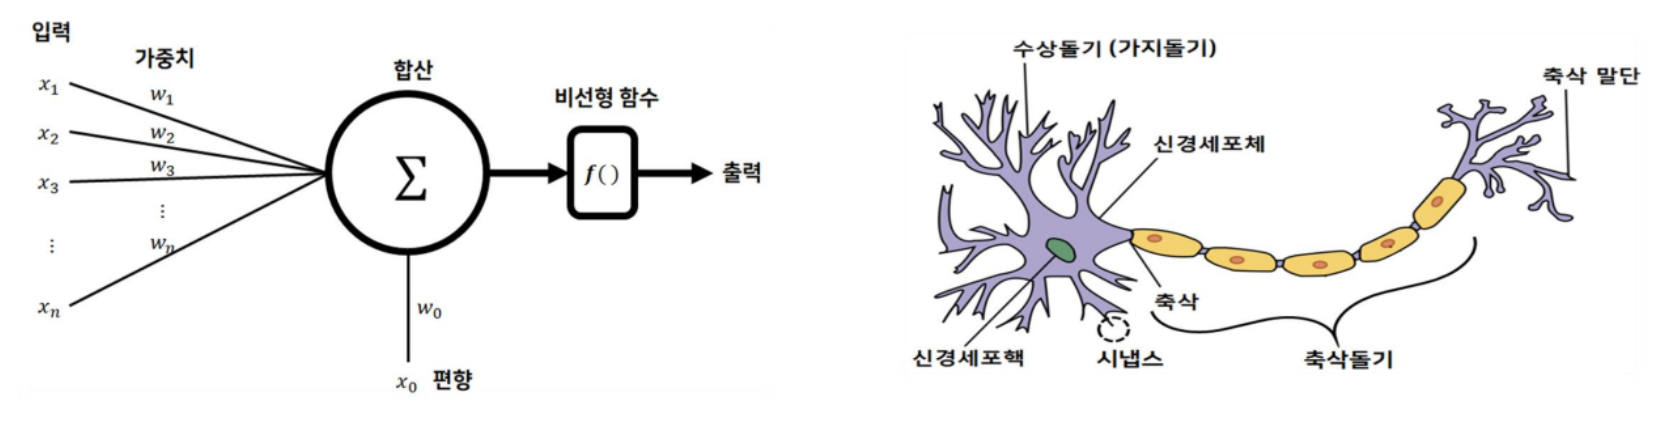

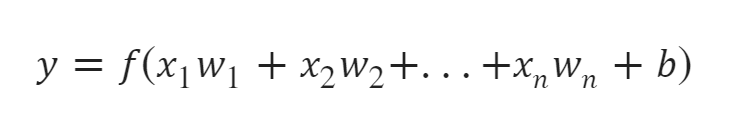

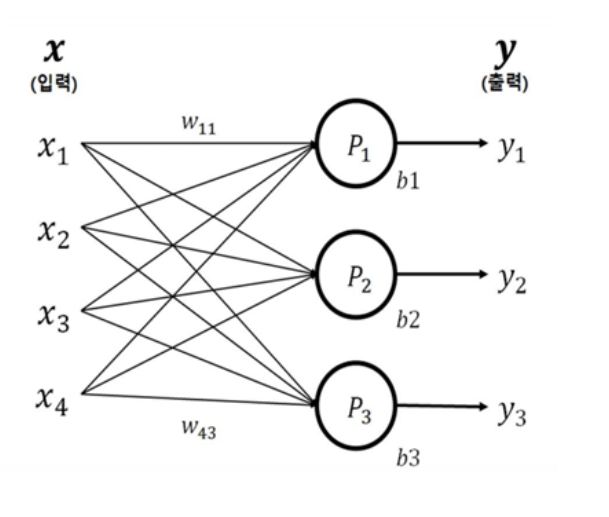

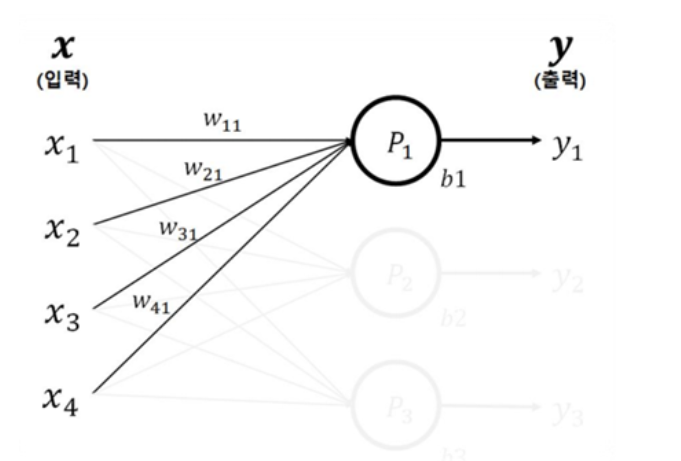

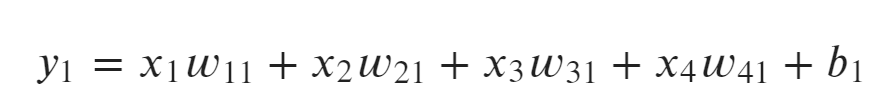

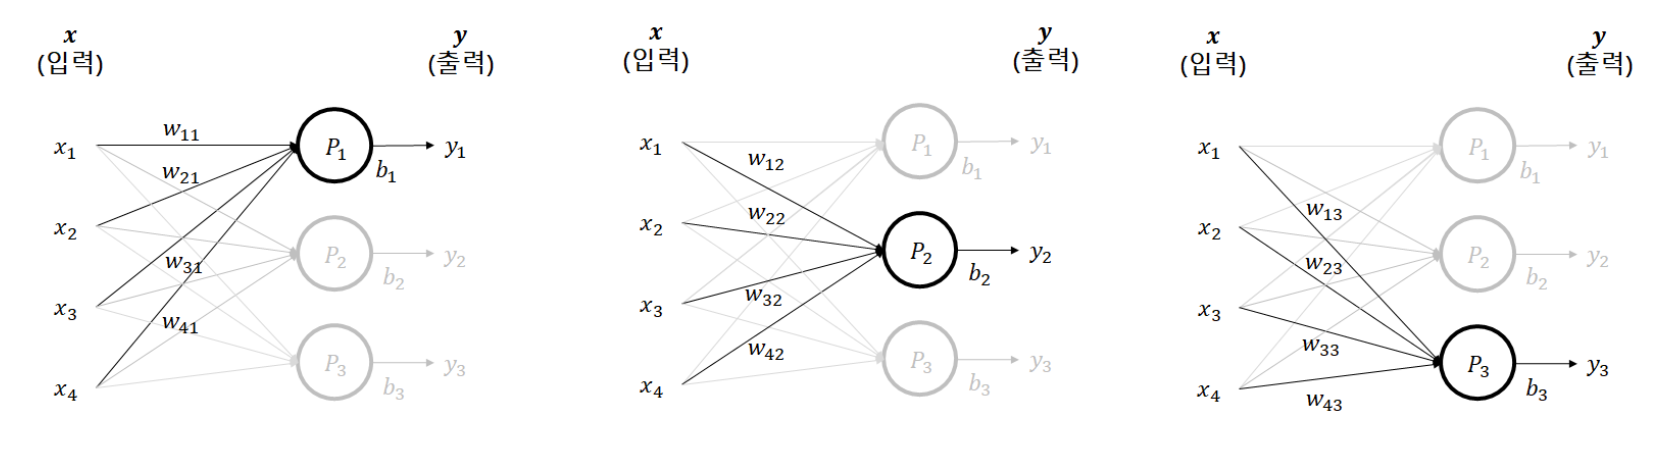

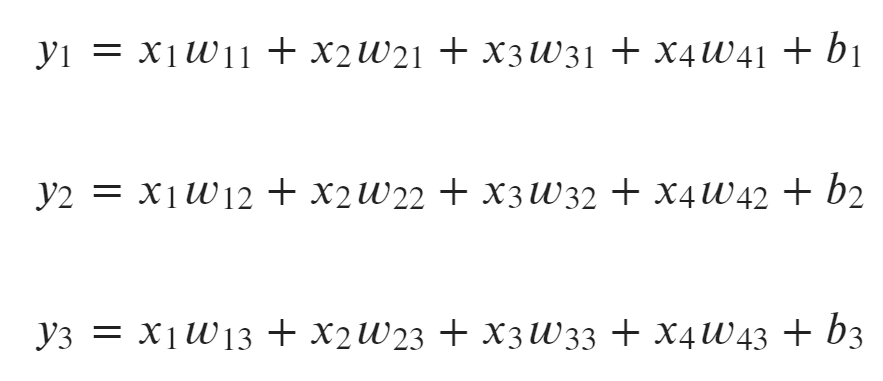

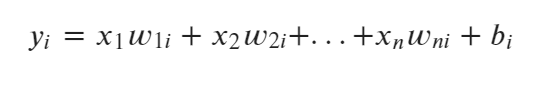

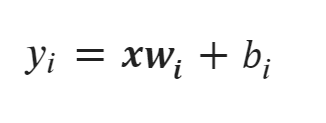

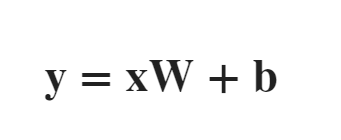

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/faults.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

In [ ]:
df_dataset = df[['X_Minimum','X_Maximum','Steel_Plate_Thickness','LogOfAreas',
                 'Pastry','Z_Scratch','Bumps']]
print("df_dataset.shape : ", df_dataset.shape)
print(df_dataset.info())

df_dataset.shape :  (1941, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Steel_Plate_Thickness  1941 non-null   int64  
 3   LogOfAreas             1941 non-null   float64
 4   Pastry                 1941 non-null   int64  
 5   Z_Scratch              1941 non-null   int64  
 6   Bumps                  1941 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 106.3 KB
None


In [ ]:
df_dataset = np.asarray(df_dataset, dtype = 'float32')

In [ ]:
df_dataset_x = df_dataset[0:1, :-3]
df_dataset_y = df_dataset[0:1, -3:]

print("df_dataset_x : {} \ndf_dataset_x.shape : {}".format(df_dataset_x,df_dataset_x.shape))
print("df_dataset_y : {} \ndf_dataset_y.shape : {}".format(df_dataset_y,df_dataset_y.shape))

df_dataset_x : [[42.     50.     80.      2.4265]] 
df_dataset_x.shape : (1, 4)
df_dataset_y : [[1. 0. 0.]] 
df_dataset_y.shape : (1, 3)


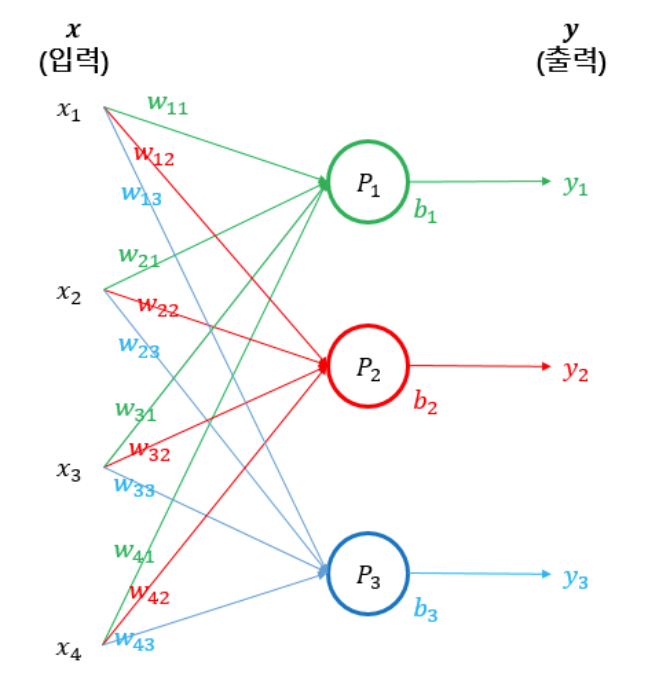

In [ ]:
RND_MEAN = 0
RND_STD  = 1

input_cnt  = df_dataset_x.shape[-1]
output_cnt = df_dataset_y.shape[-1]
# print(df_dataset_x.shape[-1])
# print(df_dataset_y.shape[-1])

weight = np.random.normal(RND_MEAN, RND_STD, size = [input_cnt, output_cnt])
bias   = np.random.normal(RND_MEAN, RND_STD, size = [output_cnt])

print("weight.shape : \n", weight.shape)
print("bias.shape : \n", bias.shape)

weight.shape : 
 (4, 3)
bias.shape : 
 (3,)


In [ ]:
print("df_dataset_x\n",df_dataset_x)
print("\nweight : \n",weight)
print("\nbias : \n",bias)

df_dataset_x
 [[42.     50.     80.      2.4265]]

weight : 
 [[-0.25935375  1.59098103  0.1158038 ]
 [-0.91673641 -1.14826799 -1.14514555]
 [-0.03674171  0.49889341 -0.63835191]
 [ 0.92429244 -2.50843711 -1.0283889 ]]

bias : 
 [ 1.824537   -1.25020233 -0.2531033 ]


In [ ]:
P_1 = np.matmul(df_dataset_x[0], weight[:, 0]) + bias[0]
P_2 = np.matmul(df_dataset_x[0], weight[:, 1]) + bias[1]
P_3 = np.matmul(df_dataset_x[0], weight[:, 2]) + bias[2]

print(P_1)
print(P_2)
print(P_3)
print("==============================")
P_total = np.matmul(df_dataset_x, weight) + bias
print(P_total)

-55.601682249030354
41.9823516167
-106.21016014313253
[[ -55.60168225   41.98235162 -106.21016014]]


In [ ]:
print(weight[:, 0])
print(df_dataset_x[0])
print(bias[0])

[-0.25935375 -0.91673641 -0.03674171  0.92429244]
[42.     50.     80.      2.4265]
1.824536999576248


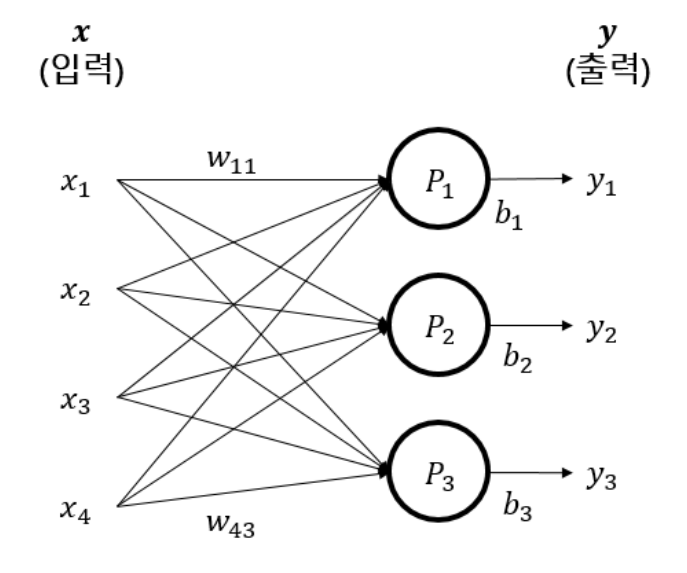

파라미터 - 가중치 / 편향 
Hyper Parameter - lr, mean, std, .... 

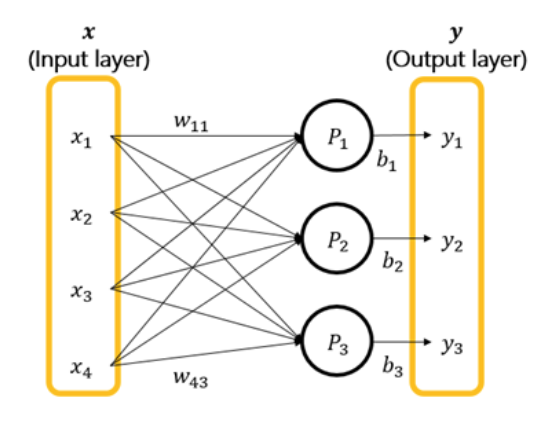

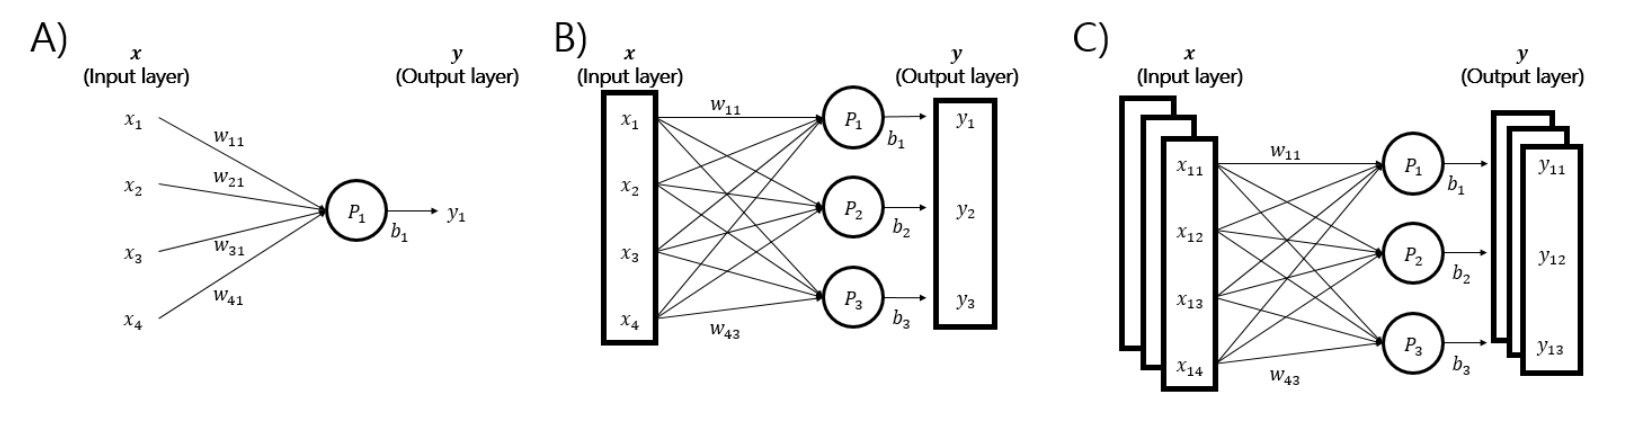

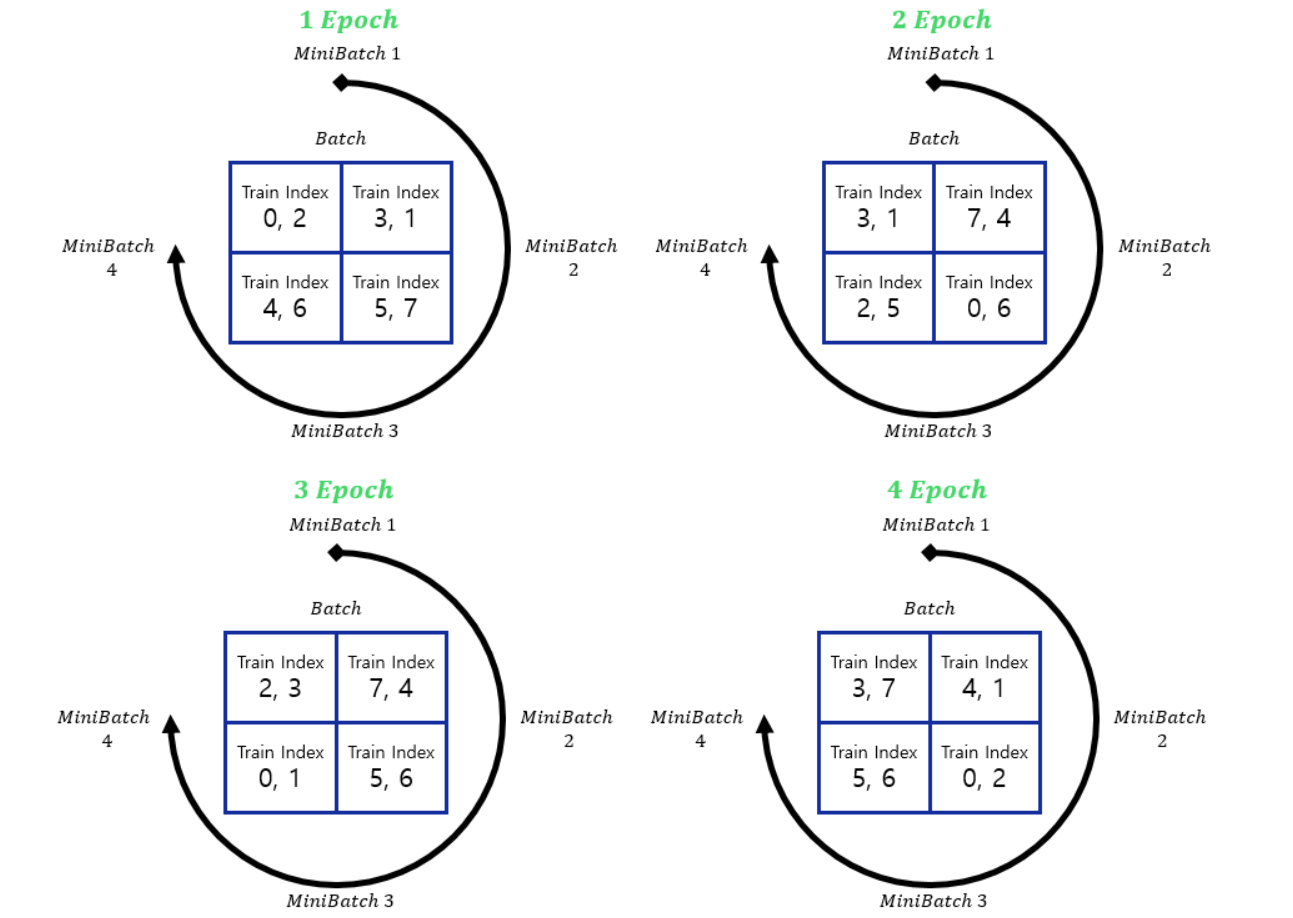

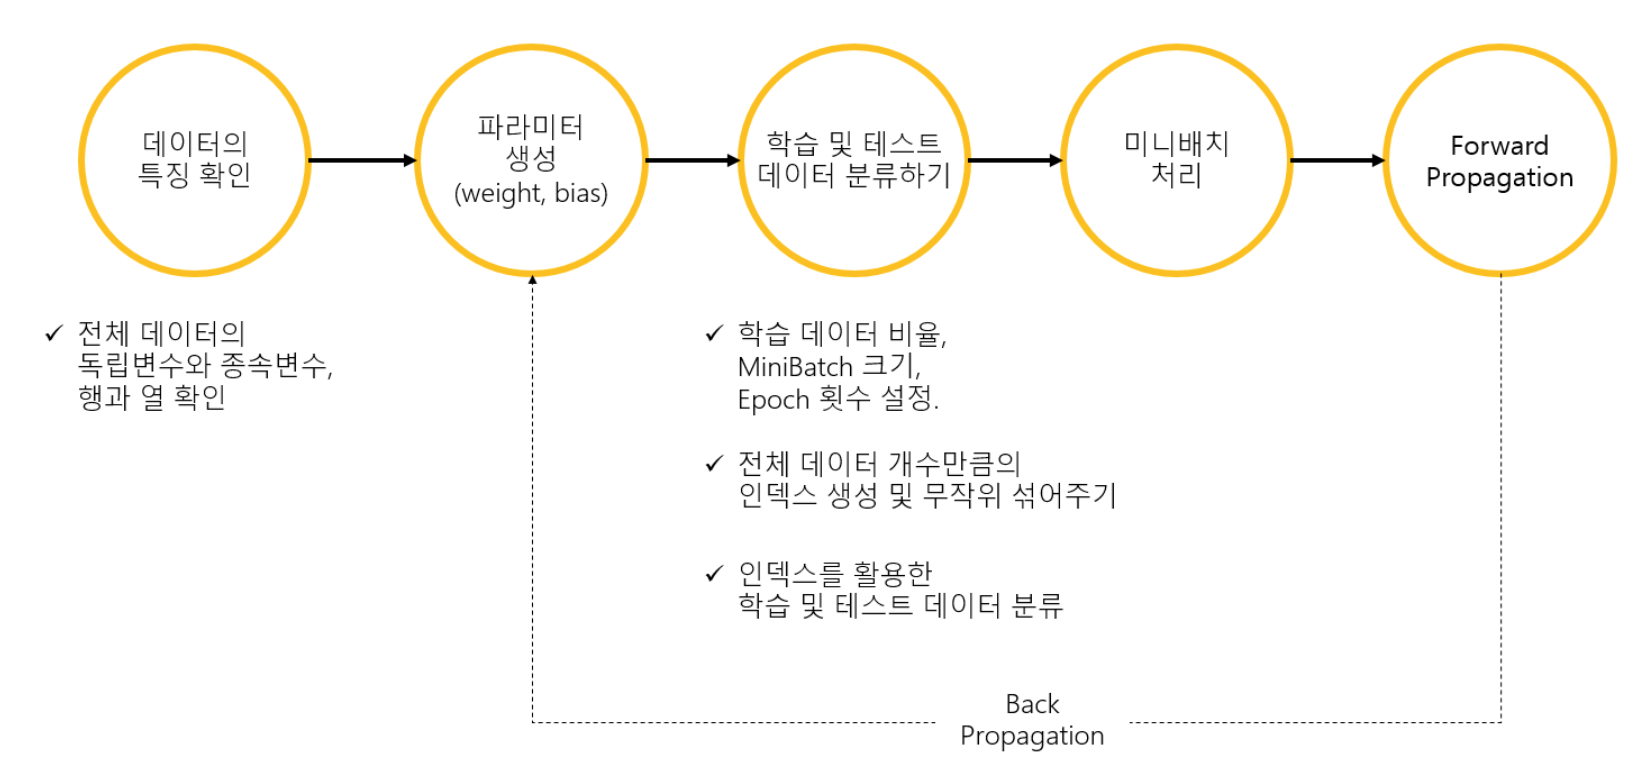

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv('/content/faults_mini.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   X_Minimum              10 non-null     int64
 1   Y_Minimum              10 non-null     int64
 2   Pixels_Areas           10 non-null     int64
 3   Steel_Plate_Thickness  10 non-null     int64
 4   Pastry                 10 non-null     int64
 5   Z_Scratch              10 non-null     int64
 6   K_Scatch               10 non-null     int64
dtypes: int64(7)
memory usage: 688.0 bytes


In [ ]:
df

X_Minimum  Y_Minimum  Pixels_Areas  ...  Pastry  Z_Scratch  K_Scatch
0         42     270900           267  ...       1          0         0
1       1084     185575           108  ...       0          0         1
2       1109    1170194           130  ...       0          1         0
3        190     210936           132  ...       1          0         0
4        330     429227           264  ...       1          0         0
5         74     779144          1506  ...       1          0         0
6         51     585861           139  ...       0          1         0
7        397     604478           444  ...       0          1         0
8         43     366881          4048  ...       0          0         1
9         48     377537          3985  ...       0          0         1

[10 rows x 7 columns]

In [ ]:
input_cnt, output_cnt = 4, 3
data = np.asarray(df, dtype='float32')
print(data)
print("\n type(data) \n",type(data))

[[4.200000e+01 2.709000e+05 2.670000e+02 8.000000e+01 1.000000e+00
  0.000000e+00 0.000000e+00]
 [1.084000e+03 1.855750e+05 1.080000e+02 4.000000e+01 0.000000e+00
  0.000000e+00 1.000000e+00]
 [1.109000e+03 1.170194e+06 1.300000e+02 1.750000e+02 0.000000e+00
  1.000000e+00 0.000000e+00]
 [1.900000e+02 2.109360e+05 1.320000e+02 1.500000e+02 1.000000e+00
  0.000000e+00 0.000000e+00]
 [3.300000e+02 4.292270e+05 2.640000e+02 1.500000e+02 1.000000e+00
  0.000000e+00 0.000000e+00]
 [7.400000e+01 7.791440e+05 1.506000e+03 1.500000e+02 1.000000e+00
  0.000000e+00 0.000000e+00]
 [5.100000e+01 5.858610e+05 1.390000e+02 7.000000e+01 0.000000e+00
  1.000000e+00 0.000000e+00]
 [3.970000e+02 6.044780e+05 4.440000e+02 7.000000e+01 0.000000e+00
  1.000000e+00 0.000000e+00]
 [4.300000e+01 3.668810e+05 4.048000e+03 4.000000e+01 0.000000e+00
  0.000000e+00 1.000000e+00]
 [4.800000e+01 3.775370e+05 3.985000e+03 4.000000e+01 0.000000e+00
  0.000000e+00 1.000000e+00]]

 type(data) 
 <class 'numpy.ndarray'>


In [ ]:
weight = np.random.normal(RND_MEAN, RND_STD, size = [input_cnt, output_cnt])
bias   = np.random.normal(RND_MEAN, RND_STD, size = [output_cnt])

print("weight.shape : ",weight.shape)
print("bais.shape : ", bias.shape)
print("data.shape : ", data.shape)

weight.shape :  (4, 3)
bais.shape :  (3,)
data.shape :  (10, 7)


In [ ]:
mb_size = 2
train_ratio = 0.8

MiniBath_step_count = int(data.shape[0] * train_ratio) // mb_size
print("MiniBath_step_count :", MiniBath_step_count)

test_begin_index = MiniBath_step_count * mb_size
print("test_begin_index : ",test_begin_index)

MiniBath_step_count : 4
test_begin_index :  8


In [ ]:
print(data.shape)

(10, 7)


In [ ]:
shuffle_map = np.arange(data.shape[0])
print("Before : shuffle_map : ",shuffle_map)

np.random.shuffle(shuffle_map)
print("After : shuffle_map : ", shuffle_map)

Before : shuffle_map :  [0 1 2 3 4 5 6 7 8 9]
After : shuffle_map :  [8 1 0 4 6 5 7 3 9 2]


In [ ]:
mb_data_1 = data[shuffle_map[0:2]]
mb_data_2 = data[shuffle_map[2:4]]
mb_data_3 = data[shuffle_map[4:6]]
mb_data_4 = data[shuffle_map[6:8]]

print("mb_data_1 \n", mb_data_1)
print("mb_data_2 \n", mb_data_2)
print("mb_data_3 \n", mb_data_3)
print("mb_data_4 \n", mb_data_4)

mb_data_1 
 [[4.30000e+01 3.66881e+05 4.04800e+03 4.00000e+01 0.00000e+00 0.00000e+00
  1.00000e+00]
 [1.08400e+03 1.85575e+05 1.08000e+02 4.00000e+01 0.00000e+00 0.00000e+00
  1.00000e+00]]
mb_data_2 
 [[4.20000e+01 2.70900e+05 2.67000e+02 8.00000e+01 1.00000e+00 0.00000e+00
  0.00000e+00]
 [3.30000e+02 4.29227e+05 2.64000e+02 1.50000e+02 1.00000e+00 0.00000e+00
  0.00000e+00]]
mb_data_3 
 [[5.10000e+01 5.85861e+05 1.39000e+02 7.00000e+01 0.00000e+00 1.00000e+00
  0.00000e+00]
 [7.40000e+01 7.79144e+05 1.50600e+03 1.50000e+02 1.00000e+00 0.00000e+00
  0.00000e+00]]
mb_data_4 
 [[3.97000e+02 6.04478e+05 4.44000e+02 7.00000e+01 0.00000e+00 1.00000e+00
  0.00000e+00]
 [1.90000e+02 2.10936e+05 1.32000e+02 1.50000e+02 1.00000e+00 0.00000e+00
  0.00000e+00]]


In [ ]:
print("첫 번째 미니배치 데이터의 행과 열")
mb_1_train_x = mb_data_1[:, : -output_cnt]
mb_1_train_y = mb_data_1[:, -output_cnt : ]
print("mb_1_train_x : \n", mb_1_train_x)
print("mb_1_train_y : \n", mb_1_train_y)

print("두 번째 미니배치 데이터의 행과 열")
mb_2_train_x = mb_data_2[:, : -output_cnt]
mb_2_train_y = mb_data_2[:, -output_cnt : ]
print("mb_2_train_x : \n", mb_2_train_x)
print("mb_2_train_y : \n", mb_2_train_y)

print("세 번째 미니배치 데이터의 행과 열")
mb_3_train_x = mb_data_3[:, : -output_cnt]
mb_3_train_y = mb_data_3[:, -output_cnt : ]
print("mb_3_train_x : \n", mb_3_train_x)
print("mb_3_train_y : \n", mb_3_train_y)

print("네 번째 미니배치 데이터의 행과 열")
mb_4_train_x = mb_data_4[:, : -output_cnt]
mb_4_train_y = mb_data_4[:, -output_cnt : ]
print("mb_4_train_x : \n", mb_4_train_x)
print("mb_4_train_y : \n", mb_4_train_y)

첫 번째 미니배치 데이터의 행과 열
mb_1_train_x : 
 [[4.30000e+01 3.66881e+05 4.04800e+03 4.00000e+01]
 [1.08400e+03 1.85575e+05 1.08000e+02 4.00000e+01]]
mb_1_train_y : 
 [[0. 0. 1.]
 [0. 0. 1.]]
두 번째 미니배치 데이터의 행과 열
mb_2_train_x : 
 [[4.20000e+01 2.70900e+05 2.67000e+02 8.00000e+01]
 [3.30000e+02 4.29227e+05 2.64000e+02 1.50000e+02]]
mb_2_train_y : 
 [[1. 0. 0.]
 [1. 0. 0.]]
세 번째 미니배치 데이터의 행과 열
mb_3_train_x : 
 [[5.10000e+01 5.85861e+05 1.39000e+02 7.00000e+01]
 [7.40000e+01 7.79144e+05 1.50600e+03 1.50000e+02]]
mb_3_train_y : 
 [[0. 1. 0.]
 [1. 0. 0.]]
네 번째 미니배치 데이터의 행과 열
mb_4_train_x : 
 [[3.97000e+02 6.04478e+05 4.44000e+02 7.00000e+01]
 [1.90000e+02 2.10936e+05 1.32000e+02 1.50000e+02]]
mb_4_train_y : 
 [[0. 1. 0.]
 [1. 0. 0.]]


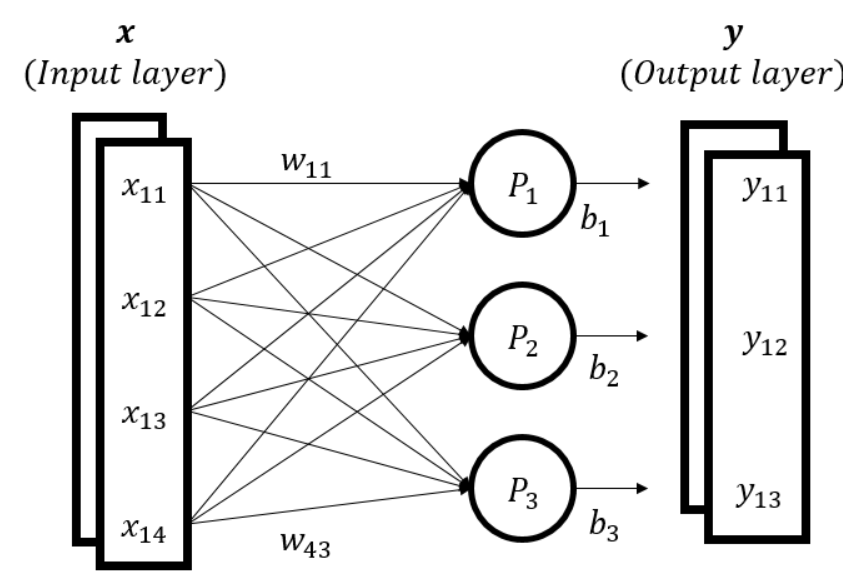

In [ ]:
print("============첫 번째 미니배치 신경망 연산 결과(P1, P2, P3)=================")
mb_1_y_hat_1 = np.matmul(mb_1_train_x, weight[:,0]) + bias[0]
mb_1_y_hat_2 = np.matmul(mb_1_train_x, weight[:,1]) + bias[1]
mb_1_y_hat_3 = np.matmul(mb_1_train_x, weight[:,2]) + bias[2]

print("mb_1_y_hat_1 : ", mb_1_y_hat_1)
print("mb_1_y_hat_2 : ", mb_1_y_hat_2)
print("mb_1_y_hat_3 : ", mb_1_y_hat_3)

============첫 번째 미니배치 신경망 연산 결과(P1, P2, P3)=================
mb_1_y_hat_1 :  [-414166.66451237 -209342.57755884]
mb_1_y_hat_2 :  [-534968.82633001 -272238.55923385]
mb_1_y_hat_3 :  [163666.01994718  84048.71617631]


In [ ]:
print("============두 번째 미니배치 신경망 연산 결과(P1, P2, P3)=================")
mb_2_y_hat_1 = np.matmul(mb_2_train_x, weight[:,0]) + bias[0]
mb_2_y_hat_2 = np.matmul(mb_2_train_x, weight[:,1]) + bias[1]
mb_2_y_hat_3 = np.matmul(mb_2_train_x, weight[:,2]) + bias[2]

print("mb_2_y_hat_1 : ", mb_2_y_hat_1)
print("mb_2_y_hat_2 : ", mb_2_y_hat_2)
print("mb_2_y_hat_3 : ", mb_2_y_hat_3)

============두 번째 미니배치 신경망 연산 결과(P1, P2, P3)=================
mb_2_y_hat_1 :  [-305502.76601791 -484095.28037808]
mb_2_y_hat_2 :  [-395856.98146839 -627524.98354567]
mb_2_y_hat_3 :  [121889.84900587 193299.56702602]


In [ ]:
print("============세 번째 미니배치 신경망 연산 결과(P1, P2, P3)=================")
mb_3_y_hat_1 = np.matmul(mb_3_train_x, weight[:,0]) + bias[0]
mb_3_y_hat_2 = np.matmul(mb_3_train_x, weight[:,1]) + bias[1]
mb_3_y_hat_3 = np.matmul(mb_3_train_x, weight[:,2]) + bias[2]

print("mb_3_y_hat_1 : ", mb_3_y_hat_1)
print("mb_3_y_hat_2 : ", mb_3_y_hat_2)
print("mb_3_y_hat_3 : ", mb_3_y_hat_3)

============세 번째 미니배치 신경망 연산 결과(P1, P2, P3)=================
mb_3_y_hat_1 :  [-660444.77449835 -878629.13892375]
mb_3_y_hat_2 :  [ -856188.28370195 -1138261.7671095 ]
mb_3_y_hat_3 :  [263839.69365355 350319.57226791]


In [ ]:
print("============네 번째 미니배치 신경망 연산 결과(P1, P2, P3)=================")
mb_4_y_hat_1 = np.matmul(mb_4_train_x, weight[:,0]) + bias[0]
mb_4_y_hat_2 = np.matmul(mb_4_train_x, weight[:,1]) + bias[1]
mb_4_y_hat_3 = np.matmul(mb_4_train_x, weight[:,2]) + bias[2]

print("mb_4_y_hat_1 : ", mb_4_y_hat_1)
print("mb_4_y_hat_2 : ", mb_4_y_hat_2)
print("mb_4_y_hat_3 : ", mb_4_y_hat_3)

============네 번째 미니배치 신경망 연산 결과(P1, P2, P3)=================
mb_4_y_hat_1 :  [-681505.07410393 -238037.04922345]
mb_4_y_hat_2 :  [-883643.80485322 -308416.61644783]
mb_4_y_hat_3 :  [272272.81624127  94946.13356189]


In [ ]:
print(mb_1_y_hat_1, mb_1_y_hat_2, mb_1_y_hat_3)
print(mb_2_y_hat_1, mb_2_y_hat_2, mb_2_y_hat_3)
print(mb_3_y_hat_1, mb_3_y_hat_2, mb_3_y_hat_3)
print(mb_4_y_hat_1, mb_4_y_hat_2, mb_4_y_hat_3)

[-414166.66451237 -209342.57755884] [-534968.82633001 -272238.55923385] [163666.01994718  84048.71617631]
[-305502.76601791 -484095.28037808] [-395856.98146839 -627524.98354567] [121889.84900587 193299.56702602]
[-660444.77449835 -878629.13892375] [ -856188.28370195 -1138261.7671095 ] [263839.69365355 350319.57226791]
[-681505.07410393 -238037.04922345] [-883643.80485322 -308416.61644783] [272272.81624127  94946.13356189]


In [ ]:
mb_data_total = np.vstack((mb_data_1, mb_data_2, mb_data_3, mb_data_4))

In [ ]:
mb_data_total_x = mb_data_total[:, :-3]

In [ ]:
print("mb_data_total_x.shape : ", mb_data_total_x.shape)

mb_data_total_x.shape :  (8, 4)


In [ ]:
display(pd.DataFrame(mb_data_total_x))

In [ ]:
mb_total_y_hat = np.matmul(mb_data_total_x, weight) + bias
print(mb_total_y_hat)

[[ -414166.66451237  -534968.82633001   163666.01994718]
 [ -209342.57755884  -272238.55923385    84048.71617631]
 [ -305502.76601791  -395856.98146839   121889.84900587]
 [ -484095.28037808  -627524.98354567   193299.56702602]
 [ -660444.77449835  -856188.28370195   263839.69365355]
 [ -878629.13892375 -1138261.7671095    350319.57226791]
 [ -681505.07410393  -883643.80485322   272272.81624127]
 [ -238037.04922345  -308416.61644783    94946.13356189]]


In [ ]:
print(mb_1_y_hat_1, mb_1_y_hat_2, mb_1_y_hat_3)
print(mb_2_y_hat_1, mb_2_y_hat_2, mb_2_y_hat_3)
print(mb_3_y_hat_1, mb_3_y_hat_2, mb_3_y_hat_3)
print(mb_4_y_hat_1, mb_4_y_hat_2, mb_4_y_hat_3)

[-414166.66451237 -209342.57755884] [-534968.82633001 -272238.55923385] [163666.01994718  84048.71617631]
[-305502.76601791 -484095.28037808] [-395856.98146839 -627524.98354567] [121889.84900587 193299.56702602]
[-660444.77449835 -878629.13892375] [ -856188.28370195 -1138261.7671095 ] [263839.69365355 350319.57226791]
[-681505.07410393 -238037.04922345] [-883643.80485322 -308416.61644783] [272272.81624127  94946.13356189]


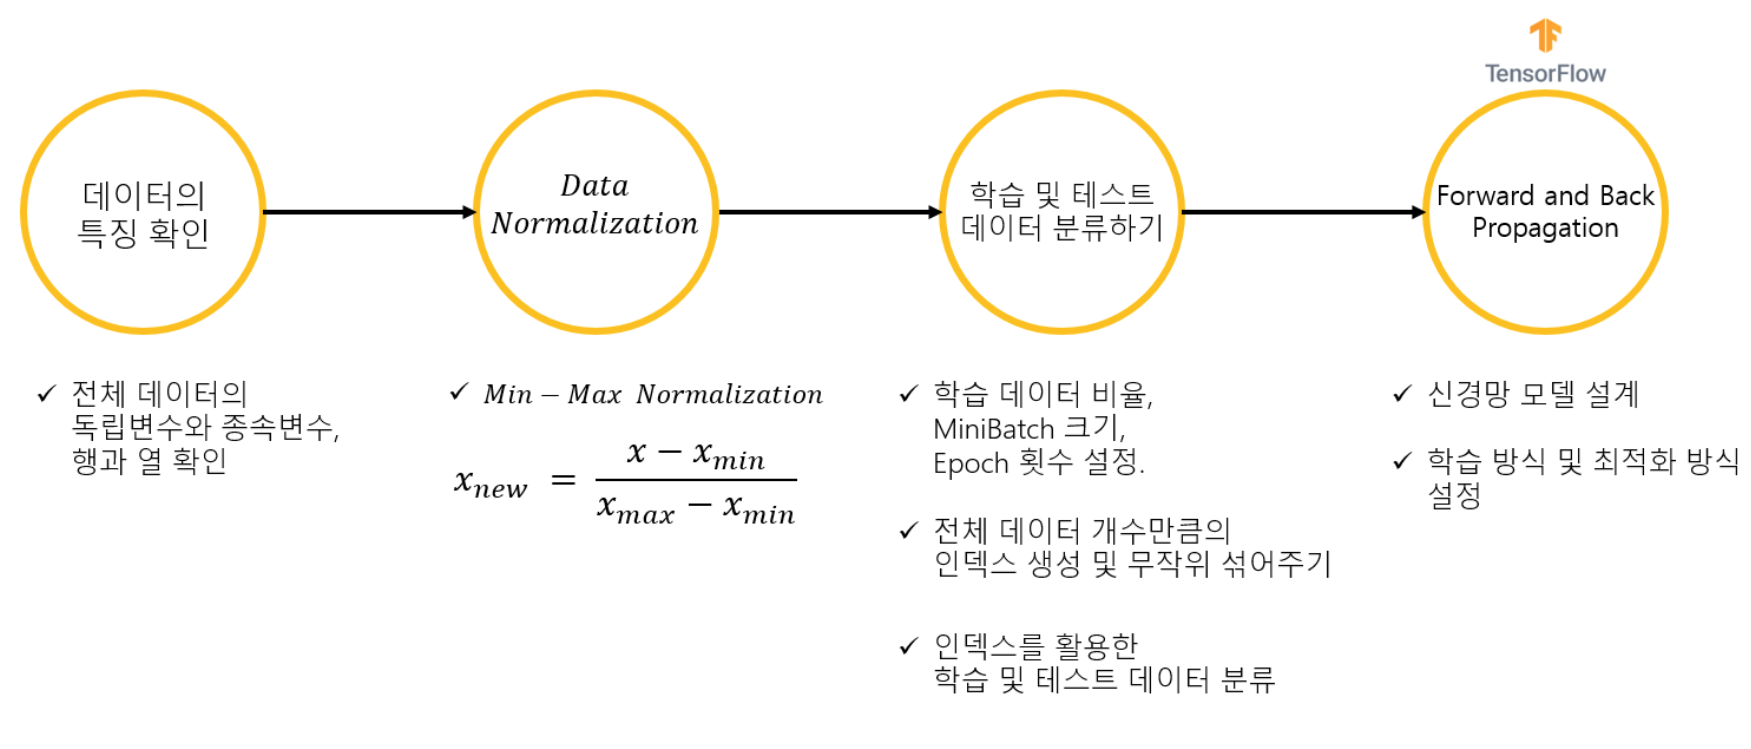

In [ ]:
import tensorflow as tf
import pandas as pd 

In [ ]:
faults = pd.read_csv('/content/faults_mini.csv')

In [ ]:
display(faults.head())

X_Minimum  Y_Minimum  Pixels_Areas  ...  Pastry  Z_Scratch  K_Scatch
0         42     270900           267  ...       1          0         0
1       1084     185575           108  ...       0          0         1
2       1109    1170194           130  ...       0          1         0
3        190     210936           132  ...       1          0         0
4        330     429227           264  ...       1          0         0

[5 rows x 7 columns]

In [ ]:
display(faults.describe())

X_Minimum     Y_Minimum  Pixels_Areas  ...     Pastry  Z_Scratch   K_Scatch
count    10.000000  1.000000e+01     10.000000  ...  10.000000  10.000000  10.000000
mean    336.800000  4.980733e+05   1102.300000  ...   0.400000   0.300000   0.300000
std     419.946769  3.014717e+05   1591.202973  ...   0.516398   0.483046   0.483046
min      42.000000  1.855750e+05    108.000000  ...   0.000000   0.000000   0.000000
25%      48.750000  2.948952e+05    133.750000  ...   0.000000   0.000000   0.000000
50%     132.000000  4.033820e+05    265.500000  ...   0.000000   0.000000   0.000000
75%     380.250000  5.998238e+05   1240.500000  ...   1.000000   0.750000   0.750000
max    1109.000000  1.170194e+06   4048.000000  ...   1.000000   1.000000   1.000000

[8 rows x 7 columns]

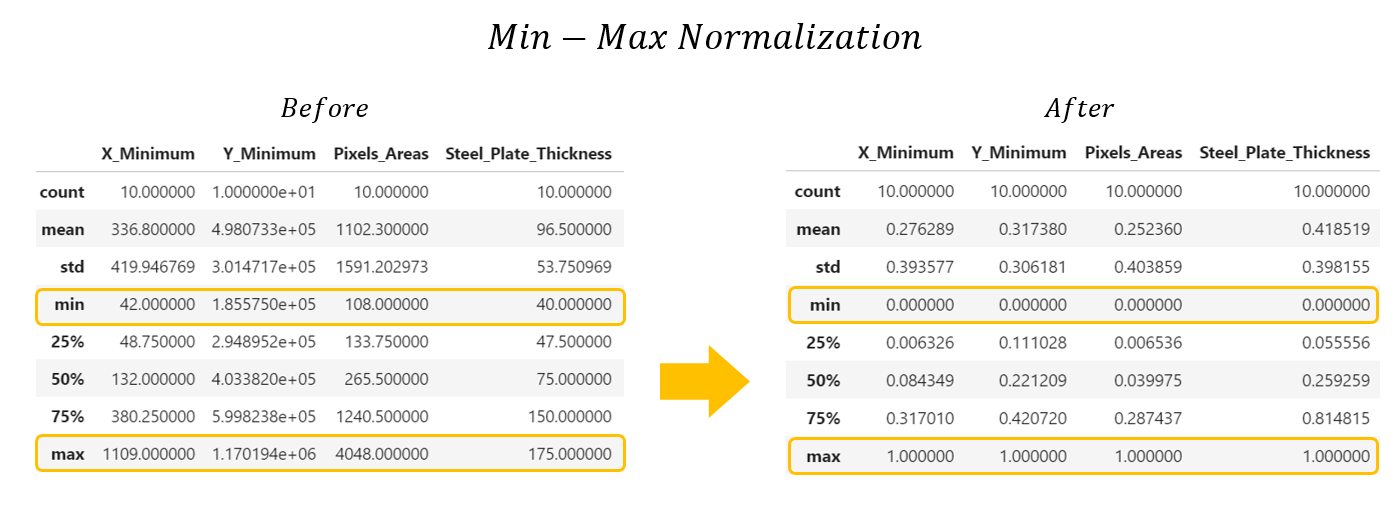

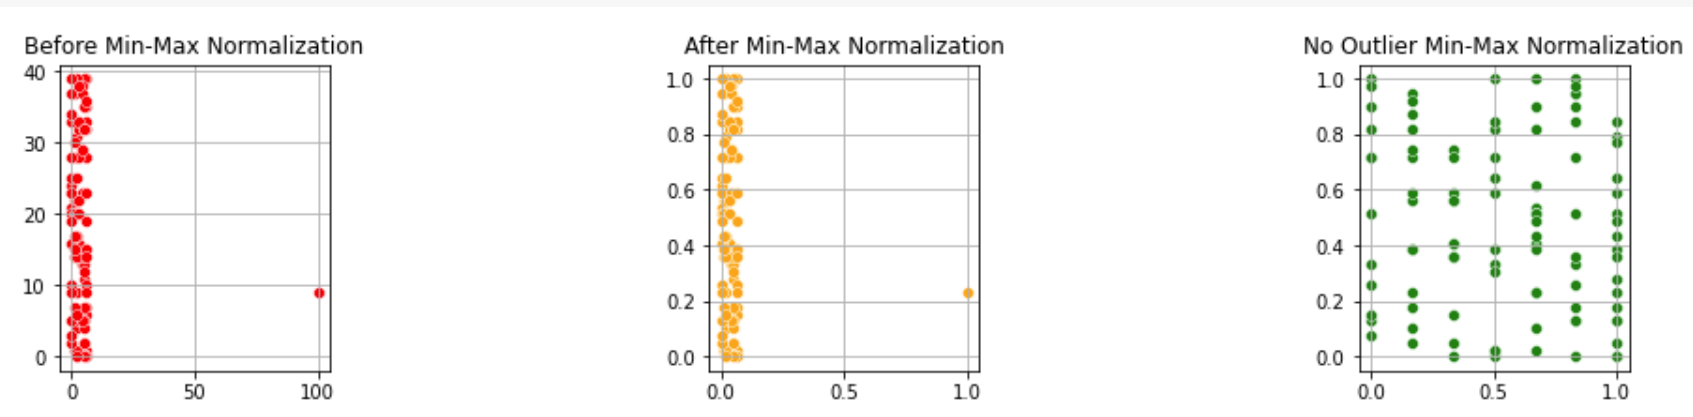

In [ ]:
import numpy as np

In [ ]:
var_x = np.random.randint(0,7,size = 99)
var_x_outlier = [100]

var_x = np.hstack([var_x, var_x_outlier])
var_y = np.random.randint(0, 40, size = 100)

In [ ]:
print(var_x)
print("===========================")
print(var_y)

[  5   6   0   1   2   4   3   6   0   0   5   3   6   6   1   4   3   2
   1   5   4   5   3   2   2   3   1   1   6   4   4   1   1   5   4   3
   1   5   2   0   0   5   5   1   0   2   1   2   2   6   3   2   0   5
   0   2   6   3   4   0   5   3   5   0   5   5   0   3   6   3   6   3
   5   3   6   6   4   4   3   3   6   1   2   6   6   2   3   3   0   5
   4   5   0   4   2   1   1   2   0 100]
[13 17  1 28  7 19  5 19  4 30 32 21 33 17 28  4  2 24  7 25  4 33 19 24
 30 32 31 18 28 13 14 36 38 19  1 27 33  1 11 12 14 30 26 29  2 20 26  0
 11  2 26  0 28  8 37 19 32 30 33 32 12 23 33 28 34  6 27  5  2 37  0  7
  4 19 11 24 10  2  9  0  2 36 39  5 26 20  1 19 18 27  7 18 15 22 27  6
 29 34 21 29]


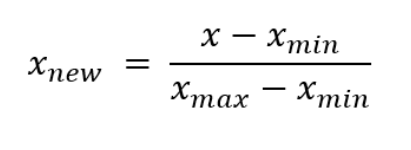

In [ ]:
var_x_norm = (var_x - var_x.min()) / (var_x.max() - var_x.min()) 
var_y_norm = (var_y - var_y.min()) / (var_y.max() - var_y.min())

print("var_x_norm : ", var_x_norm[:10])
print("var_y_norm : ", var_y_norm[:10])

NameError: ignored

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

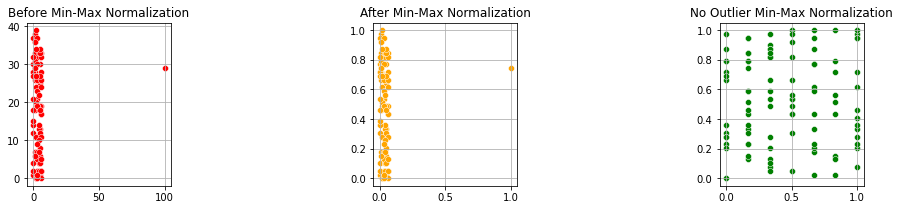

In [ ]:
plt.figure(figsize=(15,3))

plt.subplot(1,5,1)
sns.scatterplot(var_x, var_y, color = 'red')
plt.title("Before Min-Max Normalization")
plt.grid()

plt.subplot(1,5,3)
sns.scatterplot(var_x_norm, var_y_norm, color = 'orange')
plt.title("After Min-Max Normalization")
plt.grid()


var_x = np.random.randint(0,7, size = 100)
var_y = np.random.randint(0,40, size = 100)

var_x_norm = (var_x - var_x.min()) / (var_x.max() - var_x.min())
var_y_norm = (var_y - var_y.min()) / (var_y.max() - var_y.min())

plt.subplot(1,5,5)

sns.scatterplot(var_x_norm, var_y_norm, color = 'green')
plt.title("No Outlier Min-Max Normalization")
plt.grid()

plt.show()

In [ ]:
var_x_norm

array([0.06, 0.05, 0.  , 0.  , 0.02, 0.06, 0.01, 0.  , 0.06, 0.01, 0.06,
       0.01, 0.06, 0.  , 0.  , 0.04, 0.05, 0.04, 0.03, 0.03, 0.03, 0.02,
       0.01, 0.02, 0.04, 0.03, 0.03, 0.02, 0.06, 0.01, 0.02, 0.03, 0.03,
       0.  , 0.  , 0.04, 0.05, 0.02, 0.01, 0.05, 0.  , 0.04, 0.  , 0.01,
       0.02, 0.02, 0.05, 0.  , 0.02, 0.05, 0.06, 0.06, 0.03, 0.04, 0.03,
       0.02, 0.01, 0.04, 0.05, 0.04, 0.02, 0.03, 0.01, 0.03, 0.02, 0.05,
       0.05, 0.03, 0.01, 0.03, 0.02, 0.02, 0.01, 0.04, 0.06, 0.01, 0.06,
       0.  , 0.06, 0.03, 0.06, 0.  , 0.06, 0.02, 0.02, 0.06, 0.05, 0.02,
       0.04, 0.  , 0.06, 0.  , 0.03, 0.01, 0.  , 0.02, 0.06, 0.03, 0.  ,
       1.  ])

In [ ]:
faults_norm = (faults - faults.min()) / (faults.max() - faults.min())
faults_norm.head()

X_Minimum  Y_Minimum  Pixels_Areas  ...  Pastry  Z_Scratch  K_Scatch
0   0.000000   0.086658      0.040355  ...     1.0        0.0       0.0
1   0.976570   0.000000      0.000000  ...     0.0        0.0       1.0
2   1.000000   1.000000      0.005584  ...     0.0        1.0       0.0
3   0.138707   0.025757      0.006091  ...     1.0        0.0       0.0
4   0.269916   0.247458      0.039594  ...     1.0        0.0       0.0

[5 rows x 7 columns]

In [ ]:
display(faults_norm.describe())

X_Minimum  Y_Minimum  Pixels_Areas  ...     Pastry  Z_Scratch   K_Scatch
count  10.000000  10.000000     10.000000  ...  10.000000  10.000000  10.000000
mean    0.276289   0.317380      0.252360  ...   0.400000   0.300000   0.300000
std     0.393577   0.306181      0.403859  ...   0.516398   0.483046   0.483046
min     0.000000   0.000000      0.000000  ...   0.000000   0.000000   0.000000
25%     0.006326   0.111028      0.006536  ...   0.000000   0.000000   0.000000
50%     0.084349   0.221209      0.039975  ...   0.000000   0.000000   0.000000
75%     0.317010   0.420720      0.287437  ...   1.000000   0.750000   0.750000
max     1.000000   1.000000      1.000000  ...   1.000000   1.000000   1.000000

[8 rows x 7 columns]

In [ ]:
print(faults_norm.head())
faults_shuffle = faults_norm.sample(frac=1)
print("========================================") 
print(faults_shuffle.head())

   X_Minimum  Y_Minimum  Pixels_Areas  ...  Pastry  Z_Scratch  K_Scatch
0   0.000000   0.086658      0.040355  ...     1.0        0.0       0.0
1   0.976570   0.000000      0.000000  ...     0.0        0.0       1.0
2   1.000000   1.000000      0.005584  ...     0.0        1.0       0.0
3   0.138707   0.025757      0.006091  ...     1.0        0.0       0.0
4   0.269916   0.247458      0.039594  ...     1.0        0.0       0.0

[5 rows x 7 columns]
   X_Minimum  Y_Minimum  Pixels_Areas  ...  Pastry  Z_Scratch  K_Scatch
1   0.976570   0.000000      0.000000  ...     0.0        0.0       1.0
2   1.000000   1.000000      0.005584  ...     0.0        1.0       0.0
6   0.008435   0.406539      0.007868  ...     0.0        1.0       0.0
4   0.269916   0.247458      0.039594  ...     1.0        0.0       0.0
8   0.000937   0.184138      1.000000  ...     0.0        0.0       1.0

[5 rows x 7 columns]


In [ ]:
faults_np = faults_shuffle.to_numpy()
print(type(faults_np))
print(faults_np[:5])

<class 'numpy.ndarray'>
[[9.76569822e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.00000000e+00 5.58375635e-03 1.00000000e+00
  0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [8.43486410e-03 4.06538976e-01 7.86802030e-03 2.22222222e-01
  0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [2.69915651e-01 2.47458154e-01 3.95939086e-02 8.14814815e-01
  1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.37207123e-04 1.84138230e-01 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00]]


In [ ]:
train_ratio = 0.8
input_cnt   = 4
output_cnt  = 3

train_idx = int(len(faults_np) * train_ratio)
print("train_idx : ", train_idx)
print("test_idx : ", len(faults) - train_idx)

train_idx :  8
test_idx :  2


In [ ]:
train_X, train_Y = faults_np[:train_idx, :-output_cnt],   faults_np[:train_idx, -output_cnt : ]
test_X, test_Y   = faults_np[train_idx : , :-output_cnt], faults_np[train_idx:, -output_cnt :]

In [ ]:
print(train_X)
print(train_Y)
print("===================")
print(test_X)
print(test_Y)


[[9.76569822e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.00000000e+00 5.58375635e-03 1.00000000e+00]
 [8.43486410e-03 4.06538976e-01 7.86802030e-03 2.22222222e-01]
 [2.69915651e-01 2.47458154e-01 3.95939086e-02 8.14814815e-01]
 [9.37207123e-04 1.84138230e-01 1.00000000e+00 0.00000000e+00]
 [3.32708529e-01 4.25446797e-01 8.52791878e-02 2.22222222e-01]
 [1.38706654e-01 2.57571710e-02 6.09137056e-03 8.14814815e-01]
 [2.99906279e-02 6.02841302e-01 3.54822335e-01 8.14814815e-01]]
[[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[0.00562324 0.19496069 0.98401015 0.        ]
 [0.         0.08665788 0.04035533 0.2962963 ]]
[[0. 0. 1.]
 [1. 0. 0.]]


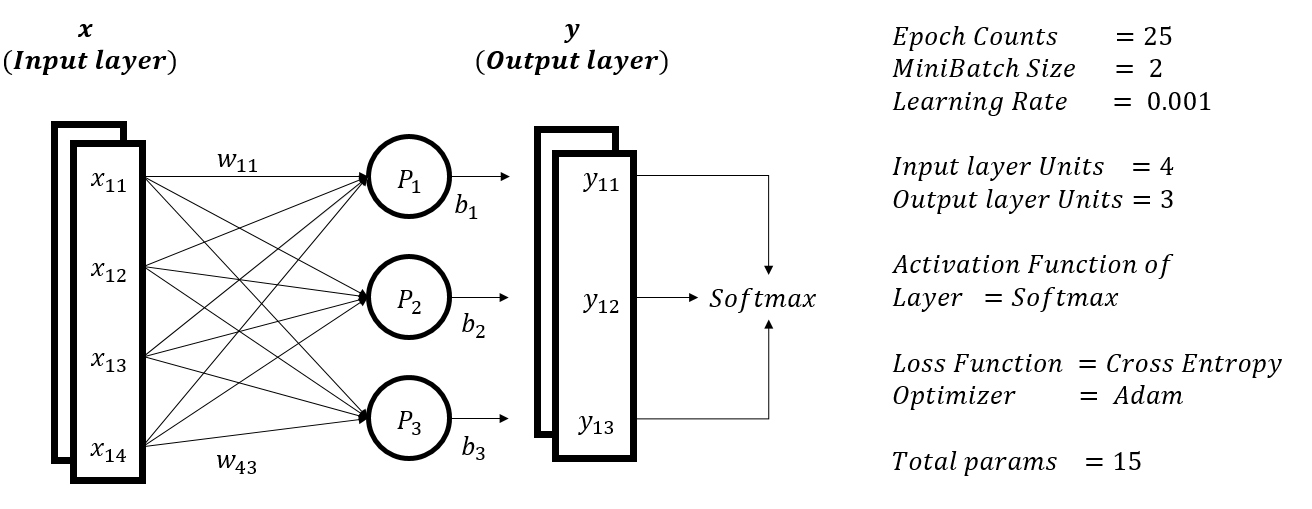

In [ ]:
simple_layer_model = tf.keras.Sequential([
                                          tf.keras.layers.Dense(units=3,
                                                                activation = 'softmax',
                                                                input_shape = (4,))
])

In [ ]:
simple_layer_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [ ]:
simple_layer_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                           loss = 'categorical_crossentropy',
                           metrics = ['accuracy'])

In [ ]:
history_1 = simple_layer_model.fit(train_X, train_Y,
                                   epochs = 25,
                                   batch_size = 2)

Epoch 1/25
4/4 [==============================] - 0s 2ms/step - loss: 1.2993 - accuracy: 0.5000
Epoch 2/25
4/4 [==============================] - 0s 3ms/step - loss: 1.2955 - accuracy: 0.5000
Epoch 3/25
4/4 [==============================] - 0s 3ms/step - loss: 1.2919 - accuracy: 0.5000
Epoch 4/25
4/4 [==============================] - 0s 3ms/step - loss: 1.2895 - accuracy: 0.5000
Epoch 5/25
4/4 [==============================] - 0s 6ms/step - loss: 1.2867 - accuracy: 0.5000
Epoch 6/25
4/4 [==============================] - 0s 3ms/step - loss: 1.2833 - accuracy: 0.5000
Epoch 7/25
4/4 [==============================] - 0s 3ms/step - loss: 1.2813 - accuracy: 0.5000
Epoch 8/25
4/4 [==============================] - 0s 3ms/step - loss: 1.2771 - accuracy: 0.5000
Epoch 9/25
4/4 [==============================] - 0s 3ms/step - loss: 1.2750 - accuracy: 0.5000
Epoch 10/25
4/4 [==============================] - 0s 5ms/step - loss: 1.2712 - accuracy: 0.5000
Epoch 11/25
4/4 [======================

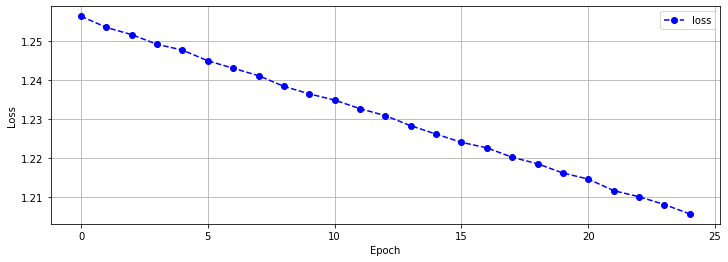

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(history_1.history['loss'], 'b--o', label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

In [ ]:
simple_layer_model.evaluate(test_X, test_Y)

1/1 [==============================] - 0s 100ms/step - loss: 1.1565 - accuracy: 0.5000


[1.156455159187317, 0.5]

In [ ]:
pred_Y = simple_layer_model.predict(test_X)
print("pred_Y : \n", pred_Y)

pred_Y : 
 [[0.44494125 0.28416902 0.2708898 ]
 [0.36536184 0.30563855 0.32899958]]


In [ ]:
pred_Y = np.argmax(pred_Y, axis = 1)
print("pred_Y : ", pred_Y)

pred_Y :  [0 0]


In [ ]:
test_Y = np.argmax(test_Y, axis = 1)
print("test_Y : ", test_Y)

In [ ]:
print("test_Y : ", test_Y)

test_Y :  [2 0]


In [ ]:
acc = np.mean(np.equal(pred_Y, test_Y))
print("ACC : {} %".format(acc*100))

ACC : 50.0 %


In [ ]:
df_dataset = pd.read_csv('/content/faults.csv')
print(df_dataset.shape)
print(df_dataset.info())

(1941, 34)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float6

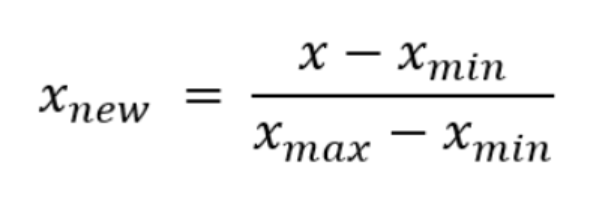

In [ ]:
faults_norm = (df_dataset - df_dataset.min()) / (df_dataset.max() - df_dataset.min())
display(faults_norm.describe())

X_Minimum    X_Maximum  ...        Bumps  Other_Faults
count  1941.000000  1941.000000  ...  1941.000000   1941.000000
mean      0.334977     0.359254  ...     0.207110      0.346728
std       0.305390     0.291180  ...     0.405339      0.476051
min       0.000000     0.000000  ...     0.000000      0.000000
25%       0.029912     0.110006  ...     0.000000      0.000000
50%       0.255132     0.270919  ...     0.000000      0.000000
75%       0.617595     0.624927  ...     0.000000      1.000000
max       1.000000     1.000000  ...     1.000000      1.000000

[8 rows x 34 columns]

In [ ]:
print(faults_norm.head())

faults_shuflle = faults_norm.sample(frac = 1)

   X_Minimum  X_Maximum  Y_Minimum  ...  Dirtiness  Bumps  Other_Faults
0   0.024633   0.026916   0.020352  ...        0.0    0.0           0.0
1   0.378299   0.378584   0.195006  ...        0.0    0.0           0.0
2   0.486217   0.486249   0.119190  ...        0.0    0.0           0.0
3   0.500293   0.500878   0.027938  ...        0.0    0.0           0.0
4   0.756012   0.761849   0.037853  ...        0.0    0.0           0.0

[5 rows x 34 columns]


In [ ]:
print(faults_shuflle.head())

      X_Minimum  X_Maximum  Y_Minimum  ...  Dirtiness  Bumps  Other_Faults
686    0.022874   0.121709   0.214178  ...        0.0    0.0           0.0
1688   0.028739   0.045641   0.023602  ...        0.0    0.0           1.0
1392   0.164809   0.196021   0.176313  ...        0.0    0.0           1.0
1294   0.008211   0.011703   0.010965  ...        0.0    0.0           1.0
1021   0.941349   0.941486   0.165737  ...        0.0    1.0           0.0

[5 rows x 34 columns]


In [ ]:
faults_np = faults_shuflle.to_numpy()
print(faults_np[:3])
print(type(faults_np))

[[2.28739003e-02 1.21708602e-01 2.14177561e-01 2.14181562e-01
  3.90886520e-02 2.85249354e-02 8.42928764e-03 5.36855488e-02
  2.06896552e-01 4.12037037e-01 2.31040564e-01 0.00000000e+00
  1.00000000e+00 0.00000000e+00 5.76768489e-02 5.21877318e-01
  3.88020571e-01 1.43984446e-01 5.70515422e-01 4.13198823e-01
  0.00000000e+00 7.11675917e-01 6.98496268e-01 4.30295630e-01
  1.93725728e-01 4.95856185e-01 1.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.87390029e-02 4.56407256e-02 2.36022805e-02 2.36110281e-02
  1.84732694e-02 9.57212597e-03 6.94176629e-03 2.37499012e-02
  3.89162562e-01 4.02777778e-01 2.34567901e-01 0.00000000e+00
  1.00000000e+00 6.15384615e-01 7.24477492e-02 3.40396228e-01
  2.55722497e-01 2.60750229e-02 3.13616071e-01 9.91698193e-01
  1.00000000e+00 6.45052942e-01 4.39039342e-01 4.93202151e-01
  8.72093610e-01 4.64168190e-01 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.000

In [ ]:
train_ratio = 0.9
input_cnt = 27
output_cnt = 7

train_idx = int(len(faults_np) * train_ratio)
print("train_idx : ", train_idx)
print("test_idx : ", len(faults_np) - train_idx)

train_idx :  1746
test_idx :  195


In [ ]:
train_X, train_Y = faults_np[:train_idx, :-output_cnt], faults_np[:train_idx, -output_cnt:]
test_X, test_Y   = faults_np[train_idx: , :-output_cnt], faults_np[train_idx: , -output_cnt:]

print(train_X.shape)
print(test_X.shape)

(1746, 27)
(195, 27)


In [ ]:
print(train_Y.shape)
print(test_Y.shape)

(1746, 7)
(195, 7)


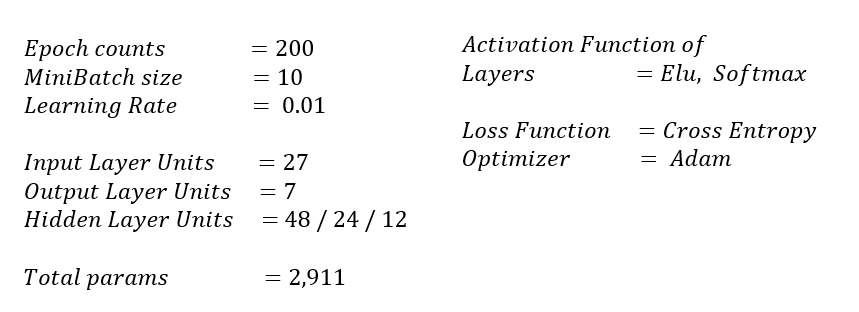

In [ ]:
import tensorflow as tf


In [ ]:
multi_layer_model = tf.keras.Sequential([
                                         tf.keras.layers.Dense(units=48,
                                                               activation = 'elu', 
                                                               input_shape= (27,)),
                                         tf.keras.layers.Dense(units=24,
                                                               activation = 'elu'),
                                         tf.keras.layers.Dense(units=12,
                                                               activation = 'elu'),
                                         tf.keras.layers.Dense(units=7,
                                                               activation = 'softmax')                                         
])

In [ ]:
multi_layer_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 48)                1344      
_________________________________________________________________
dense_3 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_4 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 91        
Total params: 2,911
Trainable params: 2,911
Non-trainable params: 0
_________________________________________________________________


In [ ]:
multi_layer_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                          loss = 'categorical_crossentropy')

In [ ]:
history_2 = multi_layer_model.fit(train_X, train_Y,epochs = 200, batch_size = 10)

Epoch 1/200
175/175 [==============================] - 1s 2ms/step - loss: 1.1960
Epoch 2/200
175/175 [==============================] - 0s 2ms/step - loss: 0.9856
Epoch 3/200
175/175 [==============================] - 0s 2ms/step - loss: 0.8833
Epoch 4/200
175/175 [==============================] - 0s 1ms/step - loss: 0.8110
Epoch 5/200
175/175 [==============================] - 0s 1ms/step - loss: 0.8239
Epoch 6/200
175/175 [==============================] - 0s 1ms/step - loss: 0.7696
Epoch 7/200
175/175 [==============================] - 0s 3ms/step - loss: 0.7644
Epoch 8/200
175/175 [==============================] - 0s 1ms/step - loss: 0.7763
Epoch 9/200
175/175 [==============================] - 0s 1ms/step - loss: 0.7186
Epoch 10/200
175/175 [==============================] - 0s 2ms/step - loss: 0.7120
Epoch 11/200
175/175 [==============================] - 0s 1ms/step - loss: 0.6847
Epoch 12/200
175/175 [==============================] - 0s 1ms/step - loss: 0.6809
Epoch 13/200


In [ ]:
multi_layer_model.evaluate(test_X, test_Y)

7/7 [==============================] - 0s 3ms/step - loss: 2.9274


2.927403211593628

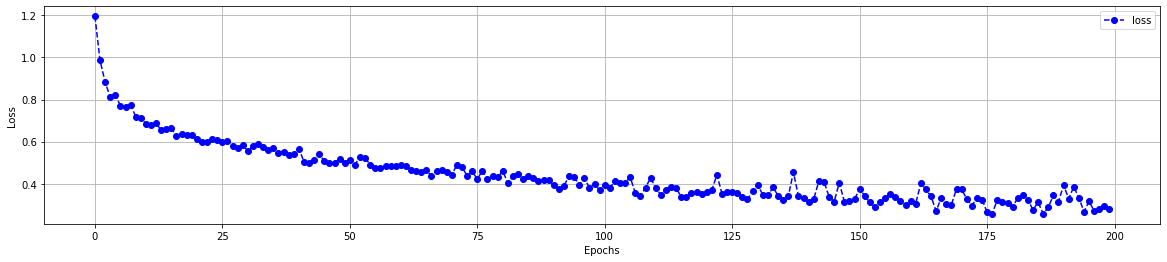

In [ ]:
plt.figure(figsize=(20,4))
plt.plot(history_2.history['loss'], 'b--o', label = 'loss')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.show()

In [ ]:
pred_Y = multi_layer_model.predict(test_X)
print(pred_Y)

In [ ]:
pred_Y = np.argmax(pred_Y, axis = 1)
print("pred_Y : \n", pred_Y)

pred_Y : 
 [2 5 1 6 6 2 5 2 6 2 0 2 6 6 2 0 6 6 0 2 5 5 6 5 5 5 6 6 6 6 6 6 5 1 5 2 5
 4 6 0 5 2 2 1 6 4 5 6 5 2 0 6 4 2 6 0 4 1 2 6 1 5 1 6 6 5 4 6 2 6 2 6 2 6
 0 6 1 5 1 6 0 6 2 5 6 6 2 5 6 2 5 1 6 6 0 2 6 6 2 6 6 6 6 6 6 0 1 5 1 6 6
 0 6 1 5 6 6 6 2 2 2 5 5 2 5 5 0 6 6 6 5 6 0 1 6 6 6 3 6 2 5 6 6 0 6 0 5 6
 5 2 5 6 2 6 4 2 6 2 2 6 6 6 5 6 0 6 4 1 5 6 5 5 2 6 6 2 6 1 2 2 6 5 5 5 3
 6 5 2 2 4 4 6 5 1 1]


In [ ]:
test_Y = np.argmax(test_Y, axis = 1)
print("test_Y : \n", test_Y)

test_Y : 
 [2 5 1 5 6 2 5 2 6 2 5 2 1 6 2 0 6 6 0 2 4 5 6 6 5 2 6 5 6 0 6 6 5 1 5 2 5
 6 6 0 6 2 2 1 5 5 5 5 5 2 0 6 4 2 6 0 4 6 2 6 6 5 1 6 5 5 4 6 2 4 2 6 2 0
 6 3 1 6 1 4 0 2 2 5 6 6 2 5 6 2 5 1 5 6 0 2 6 5 2 6 6 6 6 5 6 0 1 6 1 0 0
 0 5 1 5 5 5 6 2 2 2 5 5 2 5 5 0 0 0 6 5 6 6 1 6 6 6 3 0 2 5 6 6 6 5 6 5 6
 5 2 6 5 2 6 6 2 6 2 2 6 6 5 5 0 6 6 4 6 5 6 5 6 2 6 6 2 0 1 2 2 6 0 5 6 3
 6 5 2 2 2 4 0 5 6 1]


In [ ]:
acc = np.mean(np.equal(pred_Y, test_Y))

print("ACC : {} %".format(acc*100))

ACC : 72.82051282051282 %


In [ ]:
display(faults_)

X_Minimum  Y_Minimum  Pixels_Areas  ...  Pastry  Z_Scratch  K_Scatch
0         42     270900           267  ...       1          0         0
1       1084     185575           108  ...       0          0         1
2       1109    1170194           130  ...       0          1         0
3        190     210936           132  ...       1          0         0
4        330     429227           264  ...       1          0         0
5         74     779144          1506  ...       1          0         0
6         51     585861           139  ...       0          1         0
7        397     604478           444  ...       0          1         0
8         43     366881          4048  ...       0          0         1
9         48     377537          3985  ...       0          0         1

[10 rows x 7 columns]

In [ ]:
train_X.shape

(1746, 27)

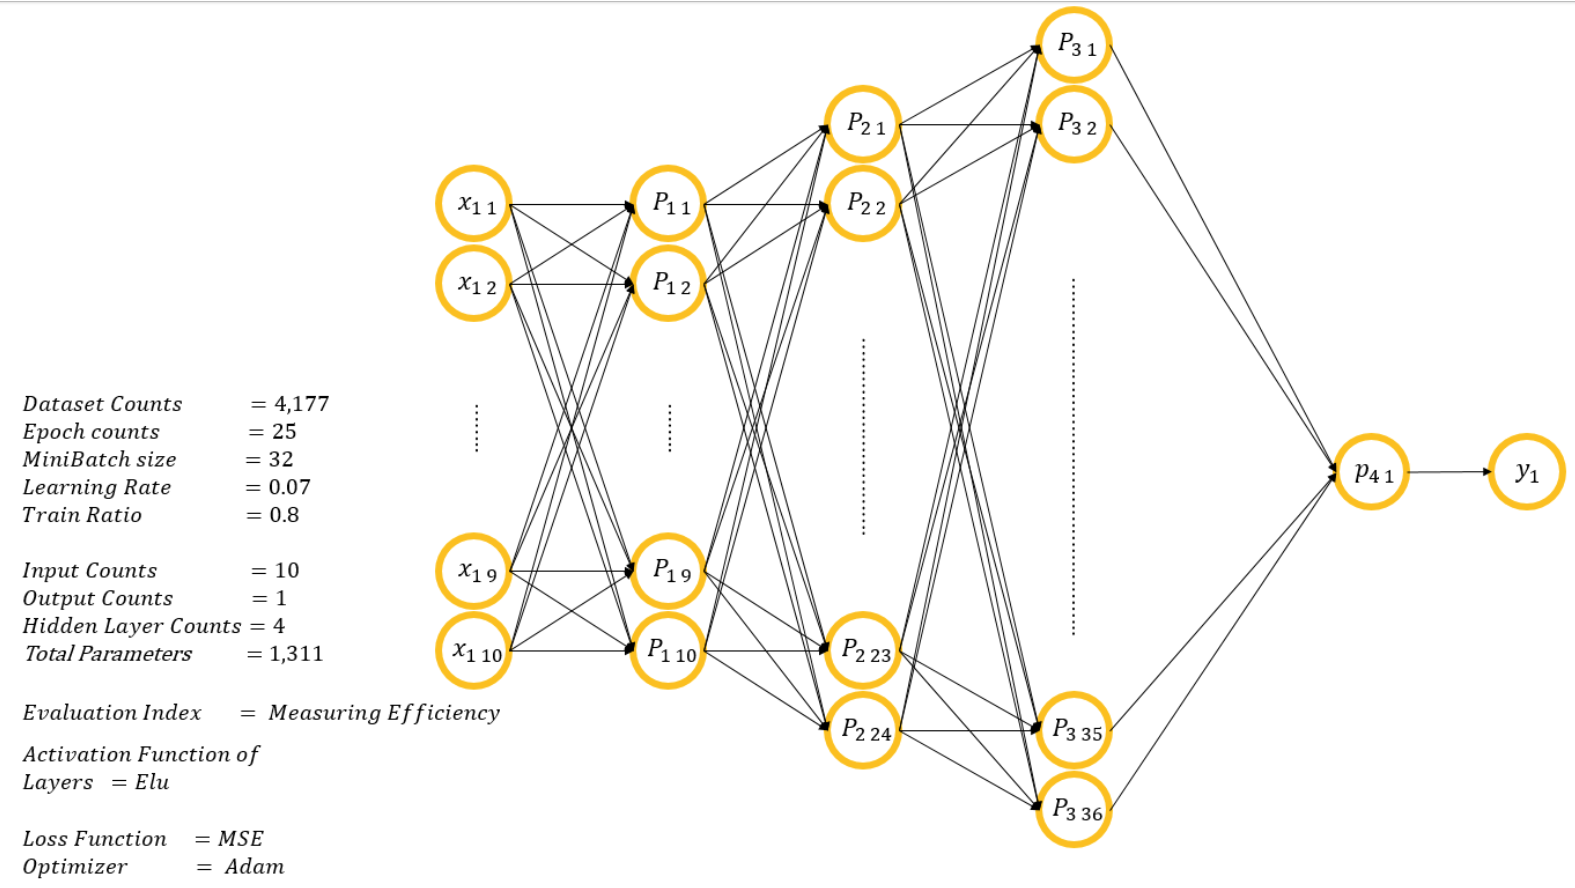

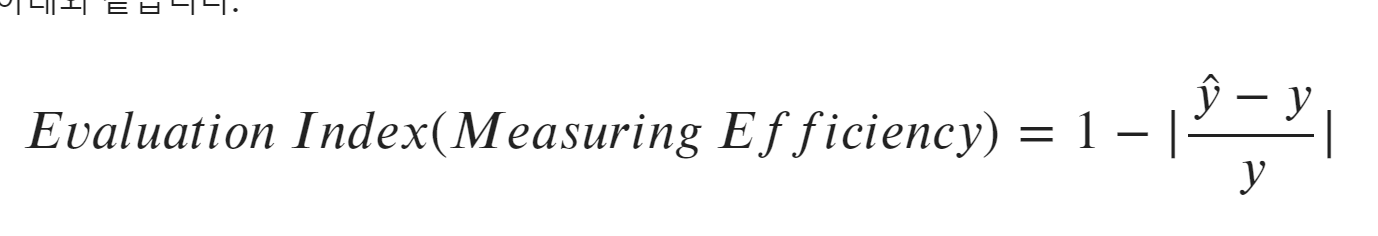

In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/abalone.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
df.describe()

Length     Diameter  ...  Shell weight        Rings
count  4177.000000  4177.000000  ...   4177.000000  4177.000000
mean      0.523992     0.407881  ...      0.238831     9.933684
std       0.120093     0.099240  ...      0.139203     3.224169
min       0.075000     0.055000  ...      0.001500     1.000000
25%       0.450000     0.350000  ...      0.130000     8.000000
50%       0.545000     0.425000  ...      0.234000     9.000000
75%       0.615000     0.480000  ...      0.329000    11.000000
max       0.815000     0.650000  ...      1.005000    29.000000

[8 rows x 8 columns]

In [1]:
import csv
with open('/content/abalone.csv') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader)

    rows = []
    for row in csvreader:
        rows.append(row)

In [2]:
rows[:3]

[['M', '0.455', '0.365', '0.095', '0.514', '0.2245', '0.101', '0.15', '15'],
 ['M', '0.35', '0.265', '0.09', '0.2255', '0.0995', '0.0485', '0.07', '7'],
 ['F', '0.53', '0.42', '0.135', '0.677', '0.2565', '0.1415', '0.21', '9']]

In [6]:
input_cnt, output_cnt = 10, 1
data = np.zeros([len(rows), input_cnt + output_cnt])
print(data.shape)

(4177, 11)


In [7]:
for n, row in enumerate(rows):
    if row[0] == 'M' : data[n,0] = 1
    if row[0] == 'F' : data[n,1] = 1
    if row[0] == 'I' : data[n,2] = 1
    data[n, 3:] = row[1:]

In [7]:
data[:5]

array([[ 1.    ,  0.    ,  0.    ,  0.455 ,  0.365 ,  0.095 ,  0.514 ,
         0.2245,  0.101 ,  0.15  , 15.    ],
       [ 1.    ,  0.    ,  0.    ,  0.35  ,  0.265 ,  0.09  ,  0.2255,
         0.0995,  0.0485,  0.07  ,  7.    ],
       [ 0.    ,  1.    ,  0.    ,  0.53  ,  0.42  ,  0.135 ,  0.677 ,
         0.2565,  0.1415,  0.21  ,  9.    ],
       [ 1.    ,  0.    ,  0.    ,  0.44  ,  0.365 ,  0.125 ,  0.516 ,
         0.2155,  0.114 ,  0.155 , 10.    ],
       [ 0.    ,  0.    ,  1.    ,  0.33  ,  0.255 ,  0.08  ,  0.205 ,
         0.0895,  0.0395,  0.055 ,  7.    ]])

In [8]:
type(data)

numpy.ndarray

In [8]:
train_ratio = 0.8
test_begin_idx = int(data.shape[0] * train_ratio)
print("test_begin_idx : ", test_begin_idx)

test_begin_idx :  3341


In [9]:
shuffle_map = np.arange(data.shape[0])
np.random.shuffle(shuffle_map)

In [10]:
shuffle_map[:5]

array([3811, 3668, 1649, 2110,  845])

In [11]:
test_data = data[shuffle_map[test_begin_idx:]]
print(test_data.shape)
train_data = data[shuffle_map[:test_begin_idx]]
print(train_data.shape)


(836, 11)
(3341, 11)


In [12]:
test_data.shape[0] + train_data.shape[0]

4177

In [13]:
train_X, train_Y = train_data[:, :-output_cnt], train_data[:, -output_cnt:]
test_X, test_Y = test_data[:, :-output_cnt], test_data[:, -output_cnt:]

print(train_X.shape)
print(test_X.shape)

print(train_Y.shape)
print(test_Y.shape)

(3341, 10)
(836, 10)
(3341, 1)
(836, 1)


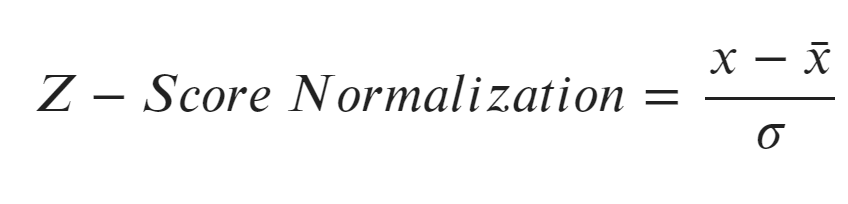

In [15]:
train_x_mean = np.mean(train_X, axis = 0)
train_x_std  = train_X.std(axis = 0)

In [16]:
train_X -= train_x_mean
train_X /= train_x_std

In [17]:
train_X[1]

array([-0.76037929,  1.49161103, -0.6916058 ,  0.09105946, -0.07750383,
        0.28123278, -0.04843987, -0.11228524,  0.29008337, -0.20313973])

In [18]:
test_X -= train_x_mean
test_X /= train_x_std

In [19]:
test_X[:,0].shape

(836,)

In [20]:
df_test_X = pd.DataFrame(test_X)
df_test_X.describe()

0           1           2  ...           7           8           9
count  836.000000  836.000000  836.000000  ...  836.000000  836.000000  836.000000
mean    -0.005647    0.030432   -0.024271  ...   -0.002141   -0.003315    0.020510
std      0.999014    1.012567    0.991099  ...    0.992044    0.994278    1.002977
min     -0.760379   -0.670416   -0.691606  ...   -1.596663   -1.641766   -1.676740
25%     -0.760379   -0.670416   -0.691606  ...   -0.781380   -0.777218   -0.746754
50%     -0.760379   -0.670416   -0.691606  ...   -0.080798   -0.101754   -0.000070
75%      1.315133    1.491611    1.445910  ...    0.620345    0.672808    0.623514
max      1.315133    1.491611    1.445910  ...    3.924772    3.365551    4.145777

[8 rows x 10 columns]

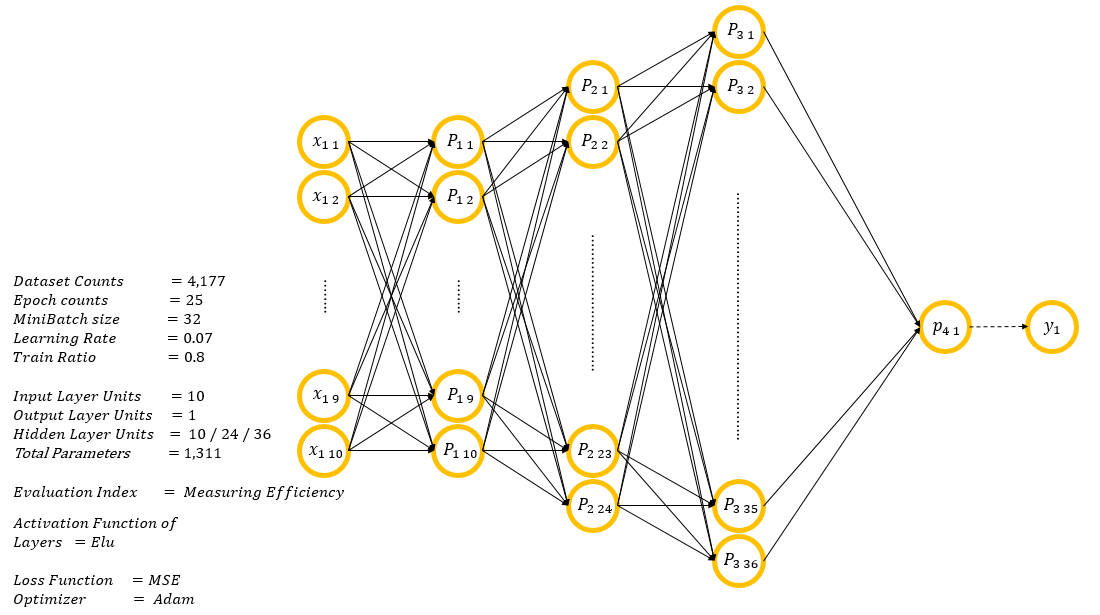

In [14]:
GJ_NET_MODEL = tf.keras.Sequential([
                                    tf.keras.layers.Dense(units=10, 
                                                          activation='elu', 
                                                          input_shape = (10,)),
                                    tf.keras.layers.Dense(units=24,
                                                          activation = 'elu'),
                                    tf.keras.layers.Dense(units=36,
                                                          activation = 'elu'),
                                    tf.keras.layers.Dense(units=1)       
])

In [22]:
GJ_NET_MODEL.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                110       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                264       
_________________________________________________________________
dense_2 (Dense)              (None, 36)                900       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 37        
Total params: 1,311
Trainable params: 1,311
Non-trainable params: 0
_________________________________________________________________


In [23]:
GJ_NET_MODEL.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.07),
                     loss = 'mse')

In [24]:
history_1 = GJ_NET_MODEL.fit(train_X, train_Y, epochs = 25, batch_size = 32,
                             validation_split = 0.2, 
                             callbacks = [tf.keras.callbacks.EarlyStopping(patience = 5,
                                                                           monitor = 'val_loss')])

Epoch 1/25
84/84 [==============================] - 4s 4ms/step - loss: 9.8054 - val_loss: 4.6880
Epoch 2/25
84/84 [==============================] - 0s 2ms/step - loss: 5.6811 - val_loss: 4.6196
Epoch 3/25
84/84 [==============================] - 0s 3ms/step - loss: 5.7316 - val_loss: 4.5952
Epoch 4/25
84/84 [==============================] - 0s 3ms/step - loss: 5.2993 - val_loss: 4.2038
Epoch 5/25
84/84 [==============================] - 0s 3ms/step - loss: 5.6234 - val_loss: 4.8574
Epoch 6/25
84/84 [==============================] - 0s 2ms/step - loss: 5.5413 - val_loss: 4.6107
Epoch 7/25
84/84 [==============================] - 0s 3ms/step - loss: 5.2411 - val_loss: 4.6766
Epoch 8/25
84/84 [==============================] - 0s 3ms/step - loss: 5.3123 - val_loss: 4.2191
Epoch 9/25
84/84 [==============================] - 0s 2ms/step - loss: 5.0585 - val_loss: 4.0723
Epoch 10/25
84/84 [==============================] - 0s 3ms/step - loss: 4.9731 - val_loss: 4.2181
Epoch 11/25
84/84 [

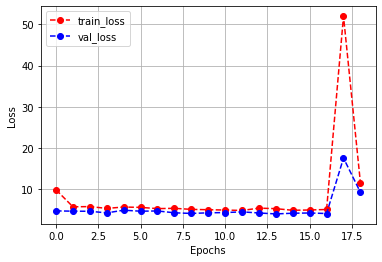

In [25]:
plt.plot(history_1.history['loss'], '--o', color = 'red', label = 'train_loss')
plt.plot(history_1.history['val_loss'], '--o', color = 'blue', label = 'val_loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.show()

In [26]:
GJ_NET_MODEL.evaluate(test_X, test_Y)

27/27 [==============================] - 0s 1ms/step - loss: 557.0137


557.0137329101562

In [27]:
pred_Y = GJ_NET_MODEL.predict(test_X)
print(pred_Y[:10])

[[10.184224]
 [10.184224]
 [10.184224]
 [10.184224]
 [10.184224]
 [10.184224]
 [10.184224]
 [10.184224]
 [10.184224]
 [10.184224]]


In [ ]:
test_Y[:10]

array([[ 7.],
       [10.],
       [ 8.],
       [ 8.],
       [ 4.],
       [ 5.],
       [ 7.],
       [ 5.],
       [17.],
       [10.]])

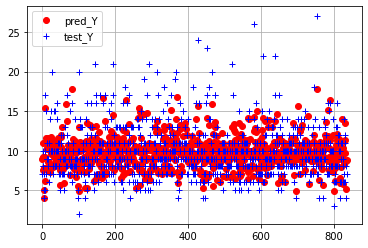

In [ ]:
plt.plot(pred_Y[:], 'o', color = 'red', label = 'pred_Y')
plt.plot(test_Y[:], '+', color = 'blue', label = 'test_Y')
plt.grid()
plt.legend()

plt.show()

In [ ]:
acc = 1 - np.mean(np.abs((pred_Y - test_Y) / test_Y) )
print("GJ_NET_MODEL_V2 - ACC : {} %".format(np.round(acc * 100,2)))

GJ_NET_MODEL_V2 - ACC : 83.83 %


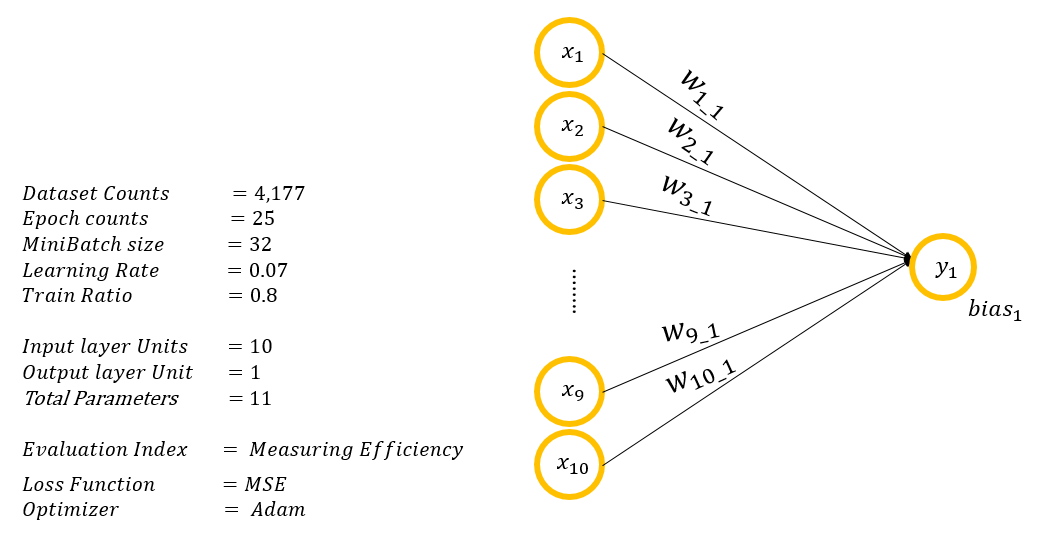

In [15]:
GJ_NET_MODEL_V2 = tf.keras.Sequential([
                                       tf.keras.layers.Dense(units=1, 
                                                             input_shape = (10,))
])

In [16]:
GJ_NET_MODEL_V2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.07),
                        loss = 'mse')

In [17]:
GJ_NET_MODEL_V2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [18]:
history_2 = GJ_NET_MODEL_V2.fit(train_X, train_Y,
                                epochs = 25, batch_size = 32)

Epoch 1/25
105/105 [==============================] - 3s 2ms/step - loss: 20.2913
Epoch 2/25
105/105 [==============================] - 0s 2ms/step - loss: 7.0964
Epoch 3/25
105/105 [==============================] - 0s 2ms/step - loss: 6.8011
Epoch 4/25
105/105 [==============================] - 0s 2ms/step - loss: 6.5543
Epoch 5/25
105/105 [==============================] - 0s 2ms/step - loss: 6.4087
Epoch 6/25
105/105 [==============================] - 0s 2ms/step - loss: 6.2241
Epoch 7/25
105/105 [==============================] - 0s 2ms/step - loss: 6.0765
Epoch 8/25
105/105 [==============================] - 0s 2ms/step - loss: 5.9611
Epoch 9/25
105/105 [==============================] - 0s 2ms/step - loss: 5.7972
Epoch 10/25
105/105 [==============================] - 0s 2ms/step - loss: 5.6745
Epoch 11/25
105/105 [==============================] - 0s 2ms/step - loss: 5.5928
Epoch 12/25
105/105 [==============================] - 0s 2ms/step - loss: 5.4646
Epoch 13/25
105/105 [===

In [19]:
GJ_NET_MODEL_V2.evaluate(test_X,test_Y)

27/27 [==============================] - 0s 1ms/step - loss: 5.2560


5.255976676940918

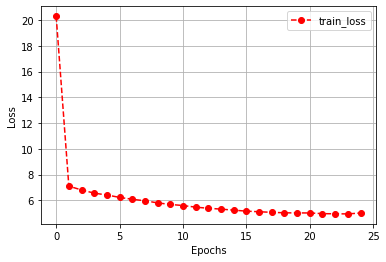

In [20]:
plt.plot(history_2.history['loss'], '--o', color = 'red', label = 'train_loss')
#plt.plot(history_2.history['val_loss'], '--o', color = 'blue', label = 'val_loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.show()

In [21]:
pred_Y = GJ_NET_MODEL_V2.predict(test_X)
print(pred_Y[:10])

[[10.775579]
 [ 9.339403]
 [10.874303]
 [ 9.924046]
 [11.572604]
 [ 9.891134]
 [ 8.525808]
 [ 8.126413]
 [10.718263]
 [ 9.174677]]


In [22]:
print(test_Y[:10])

[[10.]
 [ 9.]
 [11.]
 [10.]
 [11.]
 [ 8.]
 [10.]
 [ 8.]
 [ 8.]
 [ 8.]]


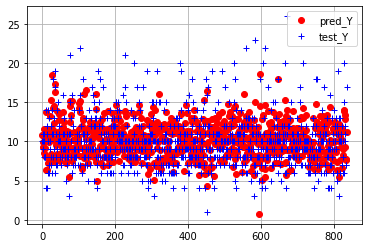

In [23]:
plt.plot(pred_Y[:], 'o', color = 'red', label = 'pred_Y')
plt.plot(test_Y[:], '+', color = 'blue', label = 'test_Y')

plt.legend()
plt.grid()
plt.show()

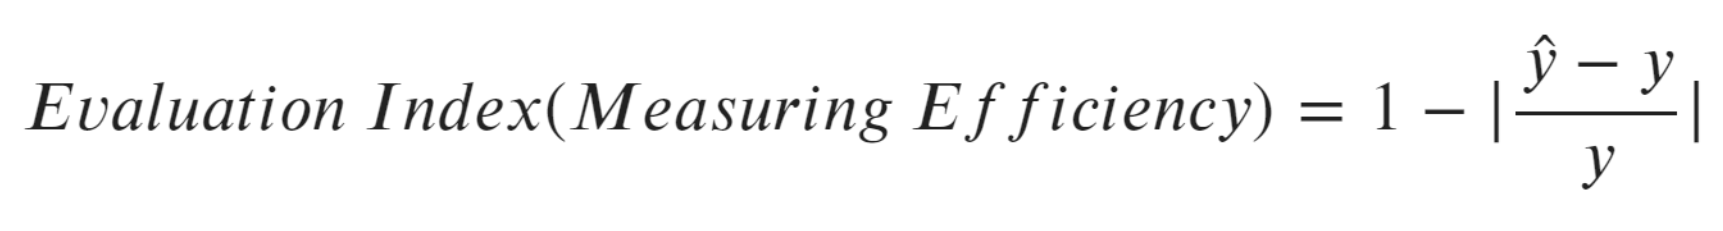

In [24]:
acc = 1 - np.mean(np.abs((pred_Y - test_Y) / test_Y) )
print("GJ_NET_MODEL_V2 - ACC : {} %".format(np.round(acc * 100,2)))

GJ_NET_MODEL_V2 - ACC : 81.3 %


In [27]:
GJ_NET_MODEL_V2.save('my_model_2.h5')

In [28]:
GJ_NET_MODEL_V2_params = GJ_NET_MODEL_V2.get_weights()
print(GJ_NET_MODEL_V2_params)

[array([[  2.207244 ],
       [  2.4368653],
       [  1.5737058],
       [  3.6027155],
       [  5.2233453],
       [  7.929143 ],
       [  3.0172582],
       [-12.786877 ],
       [ -2.565857 ],
       [ 14.871335 ]], dtype=float32), array([2.1473932], dtype=float32)]


In [29]:
print("weight : \n", GJ_NET_MODEL_V2_params[0])
print("bias : \n", GJ_NET_MODEL_V2_params[1])

weight : 
 [[  2.207244 ]
 [  2.4368653]
 [  1.5737058]
 [  3.6027155]
 [  5.2233453]
 [  7.929143 ]
 [  3.0172582]
 [-12.786877 ]
 [ -2.565857 ]
 [ 14.871335 ]]
bias : 
 [2.1473932]


In [32]:
load_model = tf.keras.models.load_model('/content/my_model_2.h5')

In [33]:
load_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [34]:
pred_Y = load_model.predict(test_X)
print(pred_Y[:10])

[[10.775579]
 [ 9.339403]
 [10.874303]
 [ 9.924046]
 [11.572604]
 [ 9.891134]
 [ 8.525808]
 [ 8.126413]
 [10.718263]
 [ 9.174677]]
